# Head

In [7]:
import pandas as pd
from pathlib import Path
home = Path.home()

# models = ['qwen3', 'gemma3', 'llama4', 'qwq']
models = ['gemma3', 'llama4', 'qwen3']

suffixes = None
# suffixes = '_sent_shuffle'
# suffixes = '_tail'

if suffixes is not None:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}{suffixes}.txt' for model in models]
else:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}.txt' for model in models]

df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
for model, csv_file in zip(models, csv_files):
    with open(csv_file, encoding='utf-8') as f:
        lines = f.readlines()
        single_df = pd.DataFrame({model: [line.rstrip('\n') for line in lines]})
    print(f"Loaded {model} data with shape: {single_df.shape}")
    df = df.join(single_df)

for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

Loaded gemma3 data with shape: (35636, 1)
Loaded llama4 data with shape: (35636, 1)
Loaded qwen3 data with shape: (35636, 1)


,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white..."
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...
...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,Reference 48 describes the engineering of a sy...,This study demonstrates that orthogonal IL-2 a...,This work describes engineered synthetic IL-2 ...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,Reference 51 shows that autoreactive T cells c...,This study identifies an important mechanism u...,This study identifies autoimmune T cell recogn...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This work demonstrates that a combined strateg...,This study presents a comprehensive strategy t...,This study reports a genome-editing strategy t...


# Load Co-citation

In [5]:
full_df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/abs_annotation.tsv', sep='\t')
co_citation_df = pd.read_parquet(home / 'projects/TLDR/data/co_citation.parquet')
print(len(co_citation_df))
co_citation_df['annotation'] = full_df['annotation'].tolist()

train_df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/train.tsv', sep='\t')
train_annotation = train_df.annotation.tolist()
co_citation_df.drop(co_citation_df[co_citation_df['annotation'].isin(train_annotation)].index, inplace=True) # drop training set entries
co_citation_df.reset_index(drop=True, inplace=True)
for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    co_citation_df = co_citation_df.drop(index-2)  # Adjusting for zero-based index
co_citation_df

35641


,doi,cited_by_doi,annotation
0,10.1073/pnas.91.7.2757,10.1038/35052563,A demonstration that cattle have been domestic...
1,10.1093/genetics/154.4.1785,10.1038/35052563,Evidence is presented for independent domestic...
2,10.1073/pnas.96.16.9252,10.1038/35052563,This paper shows how the identity-by-descent a...
3,10.1101/gr.10.2.220,10.1038/35052563,The pattern of linkage disequilibrium (LD) acr...
4,10.1126/science.8134840,10.1038/35052563,The first paper to show the use of divergent i...
...,...,...,...
35631,10.2337/db08-1168,10.1038/s41573-019-0041-4,This article describes the good manufacturing ...
35632,10.1126/science.aar3246,10.1038/s41573-019-0041-4,This study reports the generation of an orthog...
35633,10.1126/science.aad2791,10.1038/s41573-019-0041-4,This article shows that some diabetogenic T ce...
35634,10.1073/pnas.1902566116,10.1038/s41573-019-0041-4,This article describes the development of gene...


In [6]:
df['cited_by_doi'] = co_citation_df['cited_by_doi'].tolist()
df

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,cited_by_doi
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,10.1038/35052563
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,10.1038/35052563
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,10.1038/35052563
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",10.1038/35052563
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,10.1038/35052563
...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,10.1038/s41573-019-0041-4
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,Reference 48 describes the engineering of a sy...,This study demonstrates that orthogonal IL-2 a...,This work describes engineered synthetic IL-2 ...,10.1038/s41573-019-0041-4
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,Reference 51 shows that autoreactive T cells c...,This study identifies an important mechanism u...,This study identifies autoimmune T cell recogn...,10.1038/s41573-019-0041-4
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This work demonstrates that a combined strateg...,This study presents a comprehensive strategy t...,This study reports a genome-editing strategy t...,10.1038/s41573-019-0041-4


In [44]:
df['cited_by_doi'].value_counts()

cited_by_doi
10.1038/nrmicro1149           24
10.1038/s41582-022-00665-2    23
10.1038/nri.2016.4            22
10.1038/nrmicro2714           19
10.1038/nrmicro3215           18
                              ..
10.1038/nrmicro2875            1
10.1038/nrc1711                1
10.1038/s41583-018-0096-y      1
10.1038/s41586-019-1411-0      1
10.1038/nrg3049                1
Name: count, Length: 9498, dtype: int64

# Drop duplicated annotations

In [148]:
df.drop_duplicates(subset=['paper_id'], keep='first', inplace=True) # Since we partioned papers according to their citation, we need to drop duplicates
df.drop_duplicates(subset=['abstract'], keep='first', inplace=True)
df

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white..."
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...
...,...,...,...,...,...,...,...
35625,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...
35626,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...
35630,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...


# Load paper title

In [149]:
df = pd.merge(df, pd.read_parquet(home / 'projects/TLDR/data/paper_title.parquet'), on='paper_id', how='inner')
df.dropna(subset=['title'], inplace=True)
df

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...
27945,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...,Plasmonic photothermal therapy of atherosclero...
27946,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,Revisiting IL-2: Biology and therapeutic prosp...
27947,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...,Immunotherapy of autoimmune encephalomyelitis ...
27948,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...


# Fetch and save metrics

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

MYSQL_HOST = os.getenv('MYSQL_HOST')
MYSQL_USER = os.getenv('MYSQL_USER')
MYSQL_PASS = os.getenv('MYSQL_PASS')
MYSQL_DB = os.getenv('MYSQL_DB')

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500  # 每批查多少条，可调大或调小

results = []
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying titles", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    sql = f"SELECT paper_id, C3, C10, C_total, beauty_coefficient, awakening_year FROM paper_metrics WHERE paper_id IN ({id_str})"
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

paper_metrics_df = pd.concat(results, ignore_index=True)
display(paper_metrics_df)

Querying titles:   0%|                                                                                                         | 0/59 [00:00<?, ?batch/s]

Querying titles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:03<00:00, 19.40batch/s]


,paper_id,C3,C10,C_total,beauty_coefficient,awakening_year
0,1353153,35.0,80.0,119,0.0000,2000
1,1634910,16.0,43.0,61,4.5000,2006
2,1655469,17.0,42.0,63,0.0000,2000
3,1778349,78.0,226.0,292,0.3214,1999
4,2550721,22.0,49.0,66,0.6250,2001
...,...,...,...,...,...,...
29211,135559127,NaN,NaN,5,0.0000,2021
29212,136137471,NaN,NaN,210,0.0000,2022
29213,136366684,NaN,NaN,107,0.0000,2022
29214,136374303,NaN,NaN,33,0.0000,2022


In [ ]:
paper_metrics_df.fillna(0, inplace=True)
paper_metrics_df['C3'] = paper_metrics_df['C3'].astype(int)
paper_metrics_df['C10'] = paper_metrics_df['C10'].astype(int)
paper_metrics_df['C_total'] = paper_metrics_df['C_total'].astype(int)
display(paper_metrics_df)
paper_metrics_df.to_parquet(home / 'projects/TLDR/data/paper_metrics.parquet', index=False)

,paper_id,C3,C10,C_total,beauty_coefficient,awakening_year
0,1353153,35,80,119,0.0000,2000
1,1634910,16,43,61,4.5000,2006
2,1655469,17,42,63,0.0000,2000
3,1778349,78,226,292,0.3214,1999
4,2550721,22,49,66,0.6250,2001
...,...,...,...,...,...,...
29211,135559127,0,0,5,0.0000,2021
29212,136137471,0,0,210,0.0000,2022
29213,136366684,0,0,107,0.0000,2022
29214,136374303,0,0,33,0.0000,2022


# Load paper metrics

In [150]:
paper_metrics_df = pd.read_parquet(home / 'projects/TLDR/data/paper_metrics.parquet')

df = pd.merge(df, paper_metrics_df, on='paper_id', how='left')
df.dropna(subset=['C3', 'C10', 'C_total'], inplace=True)
df['C3'] = df['C3'].astype(int)
df['C10'] = df['C10'].astype(int)
df['C_total'] = df['C_total'].astype(int)

display(df)

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,title,C3,C10,C_total,beauty_coefficient,awakening_year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,Evidence for two independent domestications of...,12,90,516,7.7912,2017.0
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,The Origin of the Domestic Pig: Independent Do...,21,53,149,165.3750,2020.0
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,Fine-mapping of quantitative trait loci by ide...,21,67,97,-1.0600,2001.0
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",Extensive Genome-wide Linkage Disequilibrium i...,28,156,249,1.6553,2005.0
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,Genetic mapping of quantitative trait loci for...,69,196,426,0.0000,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27929,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...,Plasmonic photothermal therapy of atherosclero...,17,0,61,-0.3744,2021.0
27930,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,Revisiting IL-2: Biology and therapeutic prosp...,167,0,347,-0.4697,2021.0
27931,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...,Immunotherapy of autoimmune encephalomyelitis ...,24,45,74,0.0000,2005.0
27932,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...,64,216,286,-0.1667,2010.0


# Match MAG PaperID

In [5]:
import pickle
print("Loading doi_mag_pid_dict...")
with open(home / "projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,title,C3,C10,C_total,beauty_coefficient,awakening_year,mag_pid
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,Evidence for two independent domestications of...,12,90,516,7.7912,2017.0,2005395185
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,The Origin of the Domestic Pig: Independent Do...,21,53,149,165.3750,2020.0,2110049233
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,Fine-mapping of quantitative trait loci by ide...,21,67,97,-1.0600,2001.0,2082900742
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",Extensive Genome-wide Linkage Disequilibrium i...,28,156,249,1.6553,2005.0,2103106090
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,Genetic mapping of quantitative trait loci for...,69,196,426,0.0000,1994.0,2045457895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27929,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...,Plasmonic photothermal therapy of atherosclero...,17,0,61,-0.3744,2021.0,2642201712
27930,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,Revisiting IL-2: Biology and therapeutic prosp...,167,0,347,-0.4697,2021.0,2830145191
27931,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...,Immunotherapy of autoimmune encephalomyelitis ...,24,45,74,0.0000,2005.0,2043139237
27932,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...,64,216,286,-0.1667,2010.0,2137227986


# Load publication venue and year from MAG

In [6]:
MAG_paper_df = pd.read_parquet(home / 'projects/TLDR/data/MAG_paper.parquet')
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,title,C3,C10,C_total,beauty_coefficient,awakening_year,mag_pid,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,Evidence for two independent domestications of...,12,90,516,7.7912,2017.0,2005395185,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,The Origin of the Domestic Pig: Independent Do...,21,53,149,165.3750,2020.0,2110049233,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,Fine-mapping of quantitative trait loci by ide...,21,67,97,-1.0600,2001.0,2082900742,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",Extensive Genome-wide Linkage Disequilibrium i...,28,156,249,1.6553,2005.0,2103106090,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,Genetic mapping of quantitative trait loci for...,69,196,426,0.0000,1994.0,2045457895,3880285,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27929,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...,Plasmonic photothermal therapy of atherosclero...,17,0,61,-0.3744,2021.0,2642201712,48687829,2017
27930,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,Revisiting IL-2: Biology and therapeutic prosp...,167,0,347,-0.4697,2021.0,2830145191,2764653179,2018
27931,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...,Immunotherapy of autoimmune encephalomyelitis ...,24,45,74,0.0000,2005.0,2043139237,200071133,2005
27932,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...,64,216,286,-0.1667,2010.0,2137227986,129060628,2009


# Load journal subject label

In [7]:
label_df = pd.read_parquet(home / 'projects/TLDR/data/cluster_df.parquet')
label_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [8]:
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,title,C3,C10,C_total,beauty_coefficient,awakening_year,mag_pid,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,Evidence for two independent domestications of...,12,90,516,7.7912,2017.0,2005395185,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,The Origin of the Domestic Pig: Independent Do...,21,53,149,165.3750,2020.0,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,Fine-mapping of quantitative trait loci by ide...,21,67,97,-1.0600,2001.0,2082900742,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",Extensive Genome-wide Linkage Disequilibrium i...,28,156,249,1.6553,2005.0,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,Genetic mapping of quantitative trait loci for...,69,196,426,0.0000,1994.0,2045457895,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27929,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...,Plasmonic photothermal therapy of atherosclero...,17,0,61,-0.3744,2021.0,2642201712,48687829,2017,7,Medicine
27930,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,Revisiting IL-2: Biology and therapeutic prosp...,167,0,347,-0.4697,2021.0,2830145191,2764653179,2018,17,Immunology and Microbiology
27931,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...,Immunotherapy of autoimmune encephalomyelitis ...,24,45,74,0.0000,2005.0,2043139237,200071133,2005,17,Medicine
27932,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...,64,216,286,-0.1667,2010.0,2137227986,129060628,2009,17,Medicine


In [9]:
df['p2v_label'].value_counts()

p2v_label
17    16055
8      6075
6      1363
7       974
4       601
9       571
11      560
22      380
18      351
21      311
12      285
20      119
1        57
3        48
14       32
5        24
24       20
16       18
15       17
23       16
2        15
0        10
19        6
13        4
25        2
Name: count, dtype: int64

# Load paper scopus label

In [101]:
paper_scopus_df = pd.read_parquet(home / 'projects/TLDR/data/paper_scopus_field.parquet')
df = df.merge(paper_scopus_df[['paper_id', 'scopus_field']], on='paper_id', how='left')
df

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,C3,C10,C_total,beauty_coefficient,awakening_year,scopus_field
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,12,90,516,7.7912,2017.0,NaN
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,21,53,149,165.3750,2020.0,Biochemistry
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,21,67,97,-1.0600,2001.0,Biochemistry
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",28,156,249,1.6553,2005.0,Biochemistry
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,69,196,426,0.0000,1994.0,Biochemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29146,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...,17,0,61,-0.3744,2021.0,Medicine
29147,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,167,0,347,-0.4697,2021.0,Biochemistry
29148,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...,24,45,74,0.0000,2005.0,Medicine
29149,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,64,216,286,-0.1667,2010.0,Medicine


In [102]:
df.scopus_field.value_counts().head(20)

scopus_field
Biochemistry                            13960
Medicine                                 6260
Neuroscience                             2419
Immunology and Microbiology              1331
Agricultural and Biological Sciences      879
Chemistry                                 547
Physics and Astronomy                     546
Earth and Planetary Sciences              471
Materials Science                         181
Psychology                                155
Social Sciences                           101
Environmental Science                      91
Pharmacology                               55
Engineering                                53
Economics                                  36
Computer Science                           36
Energy                                     33
Chemical Engineering                       25
Mathematics                                18
Dentistry                                  17
Name: count, dtype: int64

# Perform LDA

In [115]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from tqdm import tqdm

nlp = spacy.load("en_core_web_lg")

def preprocess(texts):
    processed_texts = []
    for doc in tqdm(nlp.pipe(texts, disable=["parser", "ner"]), total=len(texts), desc="Preprocessing abstracts", unit="abstract"):
        tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
        processed_texts.append(tokens)
    return processed_texts

# 预处理
texts = preprocess(df['abstract'].dropna().tolist())

Preprocessing abstracts: 100%|███████████████████████████████████████| 34146/34146 [03:29<00:00, 162.84abstract/s]


In [117]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.ldamulticore import LdaMulticore

# 构建字典和语料
dictionary = Dictionary(texts) # 创建字典
corpus = [dictionary.doc2bow(text) for text in texts]

def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step), desc="Training LDA models & computing coherence values", unit="topic"):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5,random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# 寻找最佳主题数
start, limit, step = 1, 60, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, start, limit, step)

Training LDA models & computing coherence values: 100%|████████████████████████| 59/59 [24:28<00:00, 24.89s/topic]


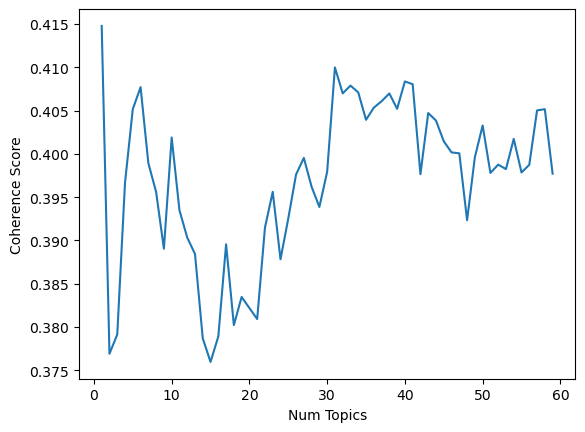

In [118]:
# 可视化
plt.plot(range(start, limit, step), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.show()

In [123]:
# 选择最佳的k
best_k = range(start, limit, step)[coherence_values.index(sorted(coherence_values)[-2])]
print(f"Best number of topics: {best_k}")

# 获取最佳模型
best_model = model_list[coherence_values.index(sorted(coherence_values)[-2])]
topics = best_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

Best number of topics: 31
(12, '0.012*"cell" + 0.007*"protein" + 0.006*"activity" + 0.005*"bacteria" + 0.005*"drug" + 0.004*"bind" + 0.004*"factor" + 0.004*"target" + 0.004*"change" + 0.004*"receptor"')
(7, '0.019*"channel" + 0.009*"membrane" + 0.007*"receptor" + 0.007*"protein" + 0.007*"ion" + 0.006*"change" + 0.006*"na" + 0.005*"cell" + 0.005*"current" + 0.004*"k"')
(21, '0.017*"neuron" + 0.009*"cell" + 0.007*"cortex" + 0.006*"brain" + 0.006*"activity" + 0.006*"response" + 0.005*"cortical" + 0.005*"area" + 0.005*"synaptic" + 0.005*"receptor"')
(25, '0.007*"change" + 0.006*"increase" + 0.005*"high" + 0.005*"climate" + 0.004*"specie" + 0.004*"result" + 0.004*"c" + 0.004*"effect" + 0.004*"model" + 0.004*"study"')
(10, '0.017*"cell" + 0.015*"gene" + 0.011*"tumor" + 0.011*"cancer" + 0.009*"expression" + 0.006*"induce" + 0.006*"human" + 0.006*"patient" + 0.006*"response" + 0.005*"specific"')
(0, '0.023*"cell" + 0.005*"disease" + 0.005*"induce" + 0.005*"mutation" + 0.004*"tumor" + 0.004*"re

# BERTTopic

In [151]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

docs = [f"{title}[SEP]{abs}" for abs, title in zip(df['abstract'].tolist(), df['title'].tolist())]
representation_model = KeyBERTInspired()

topic_model = BERTopic(representation_model=representation_model, verbose=True,
                        n_gram_range=(1, 3),
                        # nr_topics='auto', 
                        )
topics, probs = topic_model.fit_transform(docs)

2025-08-01 11:21:43,353 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/873 [00:00<?, ?it/s]

2025-08-01 11:22:24,470 - BERTopic - Embedding - Completed ✓
2025-08-01 11:22:24,472 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-01 11:22:40,743 - BERTopic - Dimensionality - Completed ✓
2025-08-01 11:22:40,744 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current p

In [152]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10154,-1_genes_gene_dna_mice,"[genes, gene, dna, mice, associated, protein, ...",[The somatic generation of immune recognition[...
1,0,340,0_tumor cells_suppressor cells_the tumor micro...,"[tumor cells, suppressor cells, the tumor micr...",[Armed Oncolytic Virus Enhances Immune Functio...
2,1,316,1_genes_metabolic_phosphorus_fixation,"[genes, metabolic, phosphorus, fixation, rrna,...",[Pole-to-pole biogeography of surface and deep...
3,2,303,2_cells_cell_dna_cd4 cells,"[cells, cell, dna, cd4 cells, coreceptor, rhes...",[The reservoir for HIV-1 in human peripheral b...
4,3,234,3_peptide_precursor protein_amyloid peptide_pr...,"[peptide, precursor protein, amyloid peptide, ...",[Learnings about the complexity of extracellul...
...,...,...,...,...,...
472,471,10,471_basallike_gene expression profiles_stem ce...,"[basallike, gene expression profiles, stem cel...",[Phenotypic heterogeneity and instability of h...
473,472,10,472_in cytosolic_atp_cytosolic_mitochondrial m...,"[in cytosolic, atp, cytosolic, mitochondrial m...",[Enjoy the Trip: Calcium in Mitochondria Back ...
474,473,10,473_diseases including_metabolic diseases incl...,"[diseases including, metabolic diseases includ...",[Structural basis of AMPK regulation by small ...
475,474,10,474_repair pathways_the bloodstream_stress_dna,"[repair pathways, the bloodstream, stress, dna...",[A network of enzymes involved in repair of ox...


In [153]:
new_topics = topic_model.reduce_outliers(docs, topics)

100%|████████████████████████████████████████████████████████████████████████████| 11/11 [00:35<00:00,  3.19s/it]


In [154]:
df['BERTopic'] = new_topics
df

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,title,C3,C10,C_total,beauty_coefficient,awakening_year,BERTopic
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,Evidence for two independent domestications of...,12,90,516,7.7912,2017.0,219
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,The Origin of the Domestic Pig: Independent Do...,21,53,149,165.3750,2020.0,219
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,Fine-mapping of quantitative trait loci by ide...,21,67,97,-1.0600,2001.0,49
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",Extensive Genome-wide Linkage Disequilibrium i...,28,156,249,1.6553,2005.0,49
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,Genetic mapping of quantitative trait loci for...,69,196,426,0.0000,1994.0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27929,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...,Plasmonic photothermal therapy of atherosclero...,17,0,61,-0.3744,2021.0,45
27930,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,Revisiting IL-2: Biology and therapeutic prosp...,167,0,347,-0.4697,2021.0,160
27931,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...,Immunotherapy of autoimmune encephalomyelitis ...,24,45,74,0.0000,2005.0,32
27932,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...,64,216,286,-0.1667,2010.0,71


# Fetch OpenAlex information

In [ ]:
res = Works().filter(doi="|".join(df.doi.unique()[0:5])).select(["doi", "primary_topic"]).get()
res[0]

In [ ]:
import time
from pyalex import Works
import pyalex
from tqdm import tqdm

pyalex.config.email = "lyuzhuoqi@outlook.com"

def get_works_by_dois_batch(doi_list, batch_size=50, delay=0.1):
    """
    Process DOIs in batches to avoid URL length limits
    """
    all_results = []

    for i in tqdm(range(0, len(doi_list), batch_size), desc="Processing DOIs", unit="batch"):
        batch = doi_list[i:i+batch_size]        
        try:
            # Create filter for this batch
            doi_filter = "|".join(batch)
            results = Works().filter(doi=doi_filter).select(['doi','primary_topic']).get()

            if results:
                all_results.extend(results)

            # Rate limiting
            time.sleep(delay)
            
        except Exception as e:
            print(f"Error processing batch {i//batch_size + 1}: {e}")
            # Try individual DOIs in this batch
            for doi in batch:
                try:
                    results = Works().filter(doi=doi).select(['doi','primary_topic']).get()
                    if results:
                        all_results.extend(results)
                    time.sleep(delay)
                except:
                    print(f"Failed to get work for DOI: {doi}")

    return all_results

# Usage
doi_list = df.doi.unique()
print(f"Total DOIs: {len(doi_list)}")

all_results = get_works_by_dois_batch(doi_list, batch_size=100)
print(f"Retrieved {len(all_results)} works")

Total DOIs: 29339


Processing DOIs: 100%|███████████████████████████████████████████████████████| 294/294 [12:02<00:00,  2.46s/batch]

Retrieved 7350 works


In [ ]:
data = []
for result_dict in all_results:
    try:
        data.append({
            'doi': ''.join(result_dict['doi'].split('doi.org/')[1:]),
            'primary_topic': result_dict['primary_topic']['display_name'],
            'subfield': result_dict['primary_topic']['subfield']['display_name'],
            'field': result_dict['primary_topic']['field']['display_name'],
            'domain': result_dict['primary_topic']['domain']['display_name']
        })
    except TypeError as e:
        print(f"Error processing result: {result_dict}. Error: {e}")
openalex_topic_df = pd.DataFrame(data)
openalex_topic_df

Error processing result: {'doi': 'https://doi.org/10.1126/science.162.3859.1243', 'primary_topic': None}. Error: 'NoneType' object is not subscriptable


,doi,primary_topic,subfield,field,domain
0,10.1098/rstb.1952.0012,Marine Invertebrate Physiology and Ecology,Paleontology,Earth and Planetary Sciences,Physical Sciences
1,10.1126/science.275.5306.1593,Memory and Neural Mechanisms,Cognitive Neuroscience,Neuroscience,Life Sciences
2,10.1126/science.279.5350.509,Cellular Mechanics and Interactions,Cell Biology,"Biochemistry, Genetics and Molecular Biology",Life Sciences
3,10.1093/oso/9780195099713.001.0001,Metaheuristic Optimization Algorithms Research,Artificial Intelligence,Computer Science,Physical Sciences
4,10.1126/science.285.5428.727,Immune Cell Function and Interaction,Immunology,Immunology and Microbiology,Life Sciences
...,...,...,...,...,...
7344,10.1038/embor.2009.90,Epigenetics and DNA Methylation,Molecular Biology,"Biochemistry, Genetics and Molecular Biology",Life Sciences
7345,10.1083/jcb.72.3.714,Metabolism and Genetic Disorders,Clinical Biochemistry,"Biochemistry, Genetics and Molecular Biology",Life Sciences
7346,10.1002/anie.201705543,RNA Interference and Gene Delivery,Molecular Biology,"Biochemistry, Genetics and Molecular Biology",Life Sciences
7347,10.1073/pnas.1707876115,Adipose Tissue and Metabolism,Physiology,Medicine,Health Sciences


In [ ]:
openalex_topic_df.to_parquet(home / 'projects/TLDR/data/openalex_topic.parquet', index=False)

# Groupped by citation

In [155]:
df

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,title,C3,C10,C_total,beauty_coefficient,awakening_year,BERTopic
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study refutes the single origin of domest...,This study suggests that there were two distin...,mtDNA analysis reveals ancient divergence betw...,Evidence for two independent domestications of...,12,90,516,7.7912,2017.0,219
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides evidence for independent d...,"This study, among others, provides evidence of...",This study demonstrates independent pig domest...,The Origin of the Domestic Pig: Independent Do...,21,53,149,165.3750,2020.0,219
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study used fine-mapping methods to identi...,The study describes the fine-mapping approach ...,This QTL study identifies a 5cM bovine chromos...,Fine-mapping of quantitative trait loci by ide...,21,67,97,-1.0600,2001.0,49
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,Reference 35 reports long-range LD in Dutch bl...,This study demonstrated that linkage disequili...,"""Genome-wide analysis of Dutch Black-and-white...",Extensive Genome-wide Linkage Disequilibrium i...,28,156,249,1.6553,2005.0,49
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on SSC4 affe...,The data reported here constitute a comprehens...,Identifies a major QTL on chromosome 4 underly...,Genetic mapping of quantitative trait loci for...,69,196,426,0.0000,1994.0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27929,10.2217/fca-2017-0009,62592077,Aim: The safety options in nanomedicine raise ...,"Together with Kharlamov et al. (2015), this is...",This study reports 5-year clinical outcomes fr...,This study evaluated the long-term safety and ...,This 5-year follow-up of the NANOM first-in-ma...,Plasmonic photothermal therapy of atherosclero...,17,0,61,-0.3744,2021.0,45
27930,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,Revisiting IL-2: Biology and therapeutic prosp...,167,0,347,-0.4697,2021.0,160
27931,10.1182/blood-2004-09-3579,123181209,Abstract We developed an approach that increas...,First study redirecting T reg cells using a ch...,This reference describes a chimeric receptor a...,This study demonstrates that antigen-specific ...,This study describes antigen-specific redirect...,Immunotherapy of autoimmune encephalomyelitis ...,24,45,74,0.0000,2005.0,32
27932,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study describes an efficient protocol for...,These studies suggest that isolation and expan...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...,64,216,286,-0.1667,2010.0,71


<Axes: xlabel='C_total', ylabel='Count'>

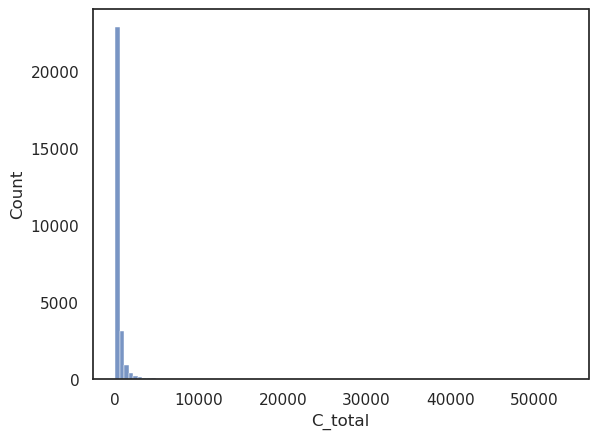

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['C_total'], bins=100)

In [157]:
df['C_total'].describe()

count    27914.000000
mean       405.447267
std       1032.513807
min          0.000000
25%         93.000000
50%        192.000000
75%        407.000000
max      53773.000000
Name: C_total, dtype: float64

In [158]:
# 数据分层
df_q1 = df[(df['C_total'] >= df['C_total'].quantile(0.75)) & (df['C_total'] <= df['C_total'].max())]
df_q2 = df[(df['C_total'] >= df['C_total'].quantile(0.5)) & (df['C_total'] < df['C_total'].quantile(0.75))]
df_q3 = df[(df['C_total'] >= df['C_total'].quantile(0.25)) & (df['C_total'] < df['C_total'].quantile(0.5))]
df_q4 = df[(df['C_total'] >= df['C_total'].min()) & (df['C_total'] < df['C_total'].quantile(0.25))]

In [159]:
print("\ncheck duplacted PaperID:")
for i, df_q in enumerate([df_q1, df_q2, df_q3, df_q4]):
    duplicates = df_q['paper_id'].duplicated().sum()
    print(f"Q{i+1}: {duplicates} duplicate PaperIDs out of {len(df_q)}")


check duplacted PaperID:
Q1: 0 duplicate PaperIDs out of 6984
Q2: 0 duplicate PaperIDs out of 7026
Q3: 0 duplicate PaperIDs out of 6951
Q4: 0 duplicate PaperIDs out of 6953


## Group prediction

In [160]:
df_group = df.copy()
df_group.dropna(subset=['BERTopic'], inplace=True)
len(df_group)

27914

In [161]:
df_group_q1 = df_group[(df_group['C_total'] >= df_group['C_total'].quantile(0.75)) & (df_group['C_total'] <= df_group['C_total'].max())]
df_group_q2 = df_group[(df_group['C_total'] >= df_group['C_total'].quantile(0.5)) & (df_group['C_total'] < df_group['C_total'].quantile(0.75))]
df_group_q3 = df_group[(df_group['C_total'] >= df_group['C_total'].quantile(0.25)) & (df_group['C_total'] < df_group['C_total'].quantile(0.5))]
df_group_q4 = df_group[(df_group['C_total'] >= df_group['C_total'].min()) & (df_group['C_total'] < df_group['C_total'].quantile(0.25))]

### Explore the data

In [26]:
df_group_q1.scopus_cat.value_counts()

scopus_cat
Genetics                                  988
Cell Biology                              926
Immunology                                832
Molecular Biology                         347
Biochemistry                              342
                                         ... 
Reproductive Medicine                       1
Sensory Systems                             1
Management, Monitoring, Policy and Law      1
Archeology (arts and humanities)            1
Computer Networks and Communications        1
Name: count, Length: 144, dtype: int64

In [27]:
df_group_q2.scopus_cat.value_counts()

scopus_cat
Cell Biology                          1081
Immunology                             919
Genetics                               905
Molecular Biology                      457
Biochemistry                           268
                                      ... 
Artificial Intelligence                  1
Health, Toxicology and Mutagenesis       1
Library and Information Sciences         1
Colloid and Surface Chemistry            1
Software                                 1
Name: count, Length: 137, dtype: int64

In [28]:
df_group_q3.scopus_cat.value_counts()

scopus_cat
Cell Biology                                   1136
Immunology                                      910
Genetics                                        786
Molecular Biology                               488
Microbiology                                    301
                                               ... 
Instrumentation                                   1
Computer Graphics and Computer-Aided Design       1
Computer Science Applications                     1
Aerospace Engineering                             1
Electrical and Electronic Engineering             1
Name: count, Length: 140, dtype: int64

In [29]:
df_group_q4.scopus_cat.value_counts()

scopus_cat
Cell Biology                          921
Immunology                            830
Genetics                              734
Molecular Biology                     467
Microbiology                          294
                                     ... 
Electrochemistry                        1
Marketing                               1
Health, Toxicology and Mutagenesis      1
Waste Management and Disposal           1
Music                                   1
Name: count, Length: 149, dtype: int64

In [110]:
df_group_q1.scopus_field.value_counts()

scopus_field
Biochemistry                            3400
Medicine                                1405
Neuroscience                             707
Immunology and Microbiology              293
Agricultural and Biological Sciences     275
Physics and Astronomy                    206
Chemistry                                186
Earth and Planetary Sciences             114
Materials Science                         63
Psychology                                48
Environmental Science                     22
Social Sciences                           19
Engineering                               18
Computer Science                          12
Economics                                 11
Pharmacology                              10
Chemical Engineering                       9
Energy                                     8
Mathematics                                8
Dentistry                                  6
Arts and Humanities                        3
Veterinary                                

In [111]:
df_group_q2.scopus_field.value_counts()

scopus_field
Biochemistry                            3621
Medicine                                1531
Neuroscience                             632
Immunology and Microbiology              336
Agricultural and Biological Sciences     217
Chemistry                                119
Earth and Planetary Sciences             115
Physics and Astronomy                    109
Psychology                                32
Materials Science                         31
Environmental Science                     21
Pharmacology                              18
Social Sciences                           17
Engineering                               10
Chemical Engineering                       7
Energy                                     7
Economics                                  5
Dentistry                                  5
Computer Science                           5
Mathematics                                2
Arts and Humanities                        1
Business                                  

In [112]:
df_group_q3.scopus_field.value_counts()

scopus_field
Biochemistry                            3703
Medicine                                1526
Neuroscience                             561
Immunology and Microbiology              374
Agricultural and Biological Sciences     179
Chemistry                                112
Physics and Astronomy                    108
Earth and Planetary Sciences              98
Materials Science                         35
Psychology                                33
Social Sciences                           21
Environmental Science                     19
Engineering                               13
Pharmacology                              12
Energy                                     8
Computer Science                           7
Economics                                  6
Dentistry                                  5
Chemical Engineering                       3
Mathematics                                2
Arts and Humanities                        1
Name: count, dtype: int64

In [113]:
df_group_q4.scopus_field.value_counts()

scopus_field
Biochemistry                            3236
Medicine                                1798
Neuroscience                             519
Immunology and Microbiology              328
Agricultural and Biological Sciences     208
Earth and Planetary Sciences             144
Chemistry                                130
Physics and Astronomy                    123
Materials Science                         52
Social Sciences                           44
Psychology                                42
Environmental Science                     29
Pharmacology                              15
Economics                                 14
Engineering                               12
Computer Science                          12
Energy                                    10
Arts and Humanities                        7
Mathematics                                6
Chemical Engineering                       6
Nursing                                    3
Business                                  

### Control the subject

In [47]:
df_biochem = df[(df.scopus_field=='Biochemistry')]

In [48]:
df_biochem_q1 = df_biochem[(df_biochem['C_total'] >= df_biochem['C_total'].quantile(0.75)) & (df_biochem['C_total'] <= df_biochem['C_total'].max())]
df_biochem_q2 = df_biochem[(df_biochem['C_total'] >= df_biochem['C_total'].quantile(0.5)) & (df_biochem['C_total'] < df_biochem['C_total'].quantile(0.75))]
df_biochem_q3 = df_biochem[(df_biochem['C_total'] >= df_biochem['C_total'].quantile(0.25)) & (df_biochem['C_total'] < df_biochem['C_total'].quantile(0.5))]
df_biochem_q4 = df_biochem[(df_biochem['C_total'] >= df_biochem['C_total'].min()) & (df_biochem['C_total'] < df_biochem['C_total'].quantile(0.25))]

### Load OpenAlex topic infomation

In [ ]:
df_topic = df.merge(pd.read_parquet(home / 'projects/TLDR/data/openalex_topic.parquet'), on='doi', how='inner')
df_topic

,doi,paper_id,abstract,annotation,gemma3,llama4,qwen3,C3,C10,C_total,beauty_coefficient,awakening_year,title,primary_topic,subfield,field,domain
0,10.1126/science.1862346,62290298,Malignant hyperthermia (MH) causes neurologica...,The first molecular description of a major tra...,This report identifies a single point mutation...,The ryr1 mutation identified is associated wit...,This study identifies a single ryr1 point muta...,82,296,1014,-2.7586,1996.0,Identification of a mutation in porcine ryanod...,Insect and Pesticide Research,Insect Science,Agricultural and Biological Sciences,Life Sciences
1,10.1126/science.288.5471.1613,20764232,"In plants, flowering is triggered by endogenou...","SOC1 , a previously uncharacterized MADS-box g...",This study identifies SOC1 and FT as early tar...,These findings suggest that SUPPRESSOR OF OVER...,This study identifies early targets of the day...,95,419,1079,1.3262,2006.0,Distinct Roles of CONSTANS Target Genes in Rep...,Plant Molecular Biology Research,Plant Science,Agricultural and Biological Sciences,Life Sciences
2,10.1146/annurev.immunol.19.1.197,83284251,Natural killer cells can discriminate between ...,"A comprehensive review of the NKp30, NKp44 and...",This review details the discovery and characte...,This study identifies and characterizes three ...,"""This study identifies the natural cytotoxicit...",245,755,1409,-0.8778,2002.0,ACTIVATINGRECEPTORS ANDCORECEPTORSINVOLVED INH...,Immune Cell Function and Interaction,Immunology,Immunology and Microbiology,Life Sciences
3,10.1126/science.290.5489.84,39451629,With the detailed description and analysis of ...,A comprehensive review of the inhibitory immun...,This review describes the essential role of in...,These findings suggest that inhibitory recepto...,This study establishes the immune regulatory p...,184,602,1014,-0.1333,2001.0,Immune Inhibitory Receptors,Immune Cell Function and Interaction,Immunology,Immunology and Microbiology,Life Sciences
4,10.1126/science.285.5428.727,125332529,"Stress-inducible MICA, a distant homolog of ma...",Shows that the NKG2D receptor binds to the str...,References 54 and 55 describe the identificati...,This study shows that γδ T cells can recognize...,This study identifies MICA as a stress-inducib...,245,1047,2297,-1.5627,2002.0,"Activation of NK Cells and T Cells by NKG2D, a...",Immune Cell Function and Interaction,Immunology,Immunology and Microbiology,Life Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,10.1126/science.aaf2786,104021261,Quantitation of metabolic pathway regulation A...,This paper describes the SIMMER method for ide...,This study used Bayesian analysis of time-seri...,This study reports systems-wide mapping of met...,"""Metabolite concentrations predominate in yeas...",94,0,222,-1.4339,2018.0,Systems-level analysis of mechanisms regulatin...,Microbial Metabolic Engineering and Bioproduction,Molecular Biology,"Biochemistry, Genetics and Molecular Biology",Life Sciences
7108,10.1126/scitranslmed.aay1063,104393236,Atherosclerotic lesional macrophages express m...,This study shows that macrophage-targeted siRN...,This work reports that atherosclerotic plaque ...,This study demonstrates that siRNA nanoparticl...,This work shows siRNA NPs targeting macrophage...,115,0,115,-0.1452,2021.0,siRNA nanoparticles targeting CaMKIIγ in lesio...,RNA Interference and Gene Delivery,Molecular Biology,"Biochemistry, Genetics and Molecular Biology",Life Sciences
7109,10.1126/sciimmunol.aat1482,83433077,Deeper insights into the biology of interleuki...,A comprehensive review discussing the discover...,This review highlights advancements in underst...,This study shows that IL-2 and its α-chain rec...,This study presents targeted therapies leverag...,167,0,347,-0.4697,2021.0,Revisiting IL-2: Biology and therapeutic prosp...,Immune Cell Function and Interaction,Immunology,Immunology and Microbiology,Life Sciences
7110,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-ce

#### Check topic distribution

In [ ]:
df_topic['domain'].value_counts()

domain
Life Sciences        4333
Health Sciences      1670
Physical Sciences     977
Social Sciences       132
Name: count, dtype: int64

In [ ]:
df_topic['field'].value_counts()

field
Biochemistry, Genetics and Molecular Biology    2558
Medicine                                        1627
Neuroscience                                     776
Immunology and Microbiology                      720
Environmental Science                            305
Agricultural and Biological Sciences             272
Engineering                                      175
Materials Science                                136
Physics and Astronomy                             94
Earth and Planetary Sciences                      90
Chemistry                                         70
Psychology                                        68
Energy                                            41
Social Sciences                                   38
Computer Science                                  35
Nursing                                           29
Mathematics                                       19
Decision Sciences                                 13
Chemical Engineering                    

In [ ]:
df_topic['subfield'].value_counts()

subfield
Molecular Biology                               1630
Immunology                                       618
Genetics                                         386
Cognitive Neuroscience                           319
Oncology                                         278
                                                ... 
Communication                                      1
General Agricultural and Biological Sciences       1
Fluid Flow and Transfer Processes                  1
Language and Linguistics                           1
General Social Sciences                            1
Name: count, Length: 153, dtype: int64

In [ ]:
df_topic['primary_topic'].value_counts()

primary_topic
Immune Cell Function and Interaction           164
Immunotherapy and Immune Responses             110
Gut microbiota and health                      100
T-cell and B-cell Immunology                   100
Neuroscience and Neuropharmacology Research     97
                                              ... 
Venomous Animal Envenomation and Studies         1
Salivary Gland Disorders and Functions           1
Cardiovascular and exercise physiology           1
Phytochemicals and Antioxidant Activities        1
Conducting polymers and applications             1
Name: count, Length: 964, dtype: int64

### 10-CV

In [162]:
import torch
import torch.nn as nn
import torch.optim as optim

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128, verbose=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
        if verbose:
            model.eval()
            with torch.no_grad():
                val_logits = model(X_val_tensor)
                val_loss = criterion(val_logits, y_val_tensor)
                preds = (torch.sigmoid(val_logits) > 0.5).cpu().numpy()
                f1 = f1_score(y_val, preds, zero_division=0)
                print(f"        Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val F1: {f1:.4f}")
    if verbose:
        print("\n")
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'acc': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

#### SBERT+MLP

In [163]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sentence_transformers import SentenceTransformer
SBERT = SentenceTransformer('all-MiniLM-L6-v2')

def sample_pairs(df, n_pairs, rng, label_col='BERTopic', id_col='paper_id'):
    """
    从df中采样n_pairs个正样本（同类不同paper）和n_pairs个负样本（异类不同paper），所有pair唯一（顺序无关）。
    允许同一paper多次被抽中参与不同pair。
    """
    # 计算最大可采样的positive/negative pair数目
    groups = {k: v for k, v in df.groupby(label_col)}
    # 最大正例数：每个类别内选2的组合数
    max_pos_pairs = sum(len(g) * (len(g) - 1) // 2 for g in groups.values() if len(g) >= 2)
    # 最大负例数：所有不同类别对，两类别分别随便取一个，去重
    labels = list(groups.keys())
    max_neg_pairs = 0
    for i in range(len(labels)):
        for j in range(i+1, len(labels)):
            max_neg_pairs += len(groups[labels[i]]) * len(groups[labels[j]])
    print(f"Max positive pairs: {max_pos_pairs}, Max negative pairs: {max_neg_pairs}")
    if n_pairs > max_pos_pairs or n_pairs > max_neg_pairs:
        raise ValueError(f"n_pairs={n_pairs} exceeds maximum possible pairs: pos={max_pos_pairs}, neg={max_neg_pairs}")

    # 正样本采样
    pos_set = set()
    pos_pairs = []
    valid_labels = [k for k, v in groups.items() if v.shape[0] >= 2]
    idx_map = df.reset_index().set_index(id_col)['index'].to_dict()  # paper_id -> 行号

    while len(pos_pairs) < n_pairs:
        label = rng.choice(valid_labels)
        group_df = groups[label]
        id1, id2 = rng.choice(group_df[id_col], 2, replace=False)
        pair = tuple(sorted((id1, id2)))
        if pair not in pos_set:
            pos_set.add(pair)
            pos_pairs.append((idx_map[id1], idx_map[id2]))

    # 负样本采样
    neg_set = set()
    neg_pairs = []
    labels = df[label_col].unique()
    while len(neg_pairs) < n_pairs:
        label1, label2 = rng.choice(labels, 2, replace=False)
        df1 = df[df[label_col] == label1]
        df2 = df[df[label_col] == label2]
        id1 = rng.choice(df1[id_col])
        id2 = rng.choice(df2[id_col])
        pair = tuple(sorted((id1, id2)))
        if pair not in pos_set and pair not in neg_set:
            neg_set.add(pair)
            neg_pairs.append((idx_map[id1], idx_map[id2]))
    return pos_pairs, neg_pairs

PAIR_SAMPLE_SIZE = 10000
rng = np.random.default_rng(42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrics_list = []
metrics_sub_df = pd.DataFrame(columns=[
    'quartile', 'feature', 'cv_fold', 'f1', 'acc', 'precision', 'recall',
])

for i, df_q in enumerate([df_group_q1, df_group_q2, df_group_q3, df_group_q4]):
# for i, df_q in enumerate([df_biochem_q1, df_biochem_q2, df_biochem_q3, df_biochem_q4]):
    print(f"Processing quartile {i+1} with {len(df_q)} samples")
    df_q = df_q.reset_index(drop=True)
    pos_pairs, neg_pairs = sample_pairs(df_q, PAIR_SAMPLE_SIZE, rng)
    print(f"Get {len(pos_pairs)} positive pairs, {len(neg_pairs)} negative pairs")
    pair_samples = (
        [{'idx1': idx1, 'idx2': idx2, 'label': 1} for idx1, idx2 in pos_pairs] +
        [{'idx1': idx1, 'idx2': idx2, 'label': 0} for idx1, idx2 in neg_pairs]
    )
    pair_samples_df = pd.DataFrame(pair_samples)

    for feat in ['abstract','annotation'] + models:
        print(f"  Processing feature: {feat}")
        X = df_q[feat].astype(str).fillna('').tolist()
        y = pair_samples_df['label'].values
        txt1_list = [X[row['idx1']] for _, row in pair_samples_df.iterrows()]
        txt2_list = [X[row['idx2']] for _, row in pair_samples_df.iterrows()]

        F1_scores = []
        for fold_idx, (train_idx, test_idx) in enumerate(cv.split(np.zeros(len(y)), y)):
            txt1_train = [txt1_list[j] for j in train_idx]
            txt2_train = [txt2_list[j] for j in train_idx]
            txt1_test = [txt1_list[j] for j in test_idx]
            txt2_test = [txt2_list[j] for j in test_idx]

            vec1_train = SBERT.encode(txt1_train, convert_to_tensor=True, show_progress_bar=False).cpu().numpy()
            vec2_train = SBERT.encode(txt2_train, convert_to_tensor=True, show_progress_bar=False).cpu().numpy()
            vec1_test = SBERT.encode(txt1_test, convert_to_tensor=True, show_progress_bar=False).cpu().numpy()
            vec2_test = SBERT.encode(txt2_test, convert_to_tensor=True, show_progress_bar=False).cpu().numpy()

            X_train = np.concatenate([vec1_train, vec2_train], axis=1)
            X_test = np.concatenate([vec1_test, vec2_test], axis=1)
            y_train = y[train_idx]
            y_test = y[test_idx]
            model = train_torch_mlp(X_train, y_train, X_test, y_test, num_epochs=10, verbose=False)
            metrics = eval_torch_mlp(model, X_test, y_test)
            metrics_list.append({
                'quartile': i+1, 'feature': feat, 'cv_fold': fold_idx+1,
                'f1': metrics['f1'], 'acc': metrics['acc'],
                'precision': metrics['precision'], 'recall': metrics['recall'],
            })
            F1_scores.append(metrics['f1'])
        print(f"    {feat}: Mean F1={np.mean(F1_scores):.4f}, Std F1={np.std(F1_scores):.4f}")

metrics_group_df = pd.DataFrame(metrics_list)
display(metrics_group_df)

Processing quartile 1 with 6984 samples
Max positive pairs: 127061, Max negative pairs: 24257575
Get 10000 positive pairs, 10000 negative pairs
  Processing feature: abstract
    abstract: Mean F1=0.8720, Std F1=0.0066
  Processing feature: annotation
    annotation: Mean F1=0.7910, Std F1=0.0054
  Processing feature: gemma3
    gemma3: Mean F1=0.8387, Std F1=0.0060
  Processing feature: llama4
    llama4: Mean F1=0.8319, Std F1=0.0037
  Processing feature: qwen3
    qwen3: Mean F1=0.8527, Std F1=0.0075
Processing quartile 2 with 7026 samples
Max positive pairs: 118819, Max negative pairs: 24560006
Get 10000 positive pairs, 10000 negative pairs
  Processing feature: abstract
    abstract: Mean F1=0.8599, Std F1=0.0082
  Processing feature: annotation
    annotation: Mean F1=0.7687, Std F1=0.0086
  Processing feature: gemma3
    gemma3: Mean F1=0.8241, Std F1=0.0052
  Processing feature: llama4
    llama4: Mean F1=0.8172, Std F1=0.0079
  Processing feature: qwen3
    qwen3: Mean F1=0.84

,quartile,feature,cv_fold,f1,acc,precision,recall
0,1,abstract,1,0.867793,0.8670,0.862648,0.873
1,1,abstract,2,0.880569,0.8740,0.836937,0.929
2,1,abstract,3,0.869652,0.8690,0.865347,0.874
3,1,abstract,4,0.867720,0.8660,0.856725,0.879
4,1,abstract,5,0.874939,0.8725,0.858518,0.892
...,...,...,...,...,...,...,...
195,4,qwen3,6,0.815105,0.8115,0.799808,0.831
196,4,qwen3,7,0.826277,0.8215,0.804739,0.849
197,4,qwen3,8,0.796773,0.7985,0.803662,0.790
198,4,qwen3,9,0.814707,0.8085,0.789128,0.842


#### TF-IDF+MLP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim
import itertools

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'acc': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

def sample_pairs(df, n_pairs, rng, label_col='mag_vid', id_col='paper_id'):
    """
    从df中采样n_pairs个正样本（同类不同paper）和n_pairs个负样本（异类不同paper），所有pair唯一（顺序无关）。
    允许同一paper多次被抽中参与不同pair。
    """
    # 正样本
    pos_set = set()
    pos_pairs = []
    # 按类别分组
    groups = {k: v for k, v in df.groupby(label_col)}
    valid_labels = [k for k, v in groups.items() if v.shape[0] >= 2]
    idx_map = df.reset_index().set_index(id_col)['index'].to_dict()  # paper_id -> 行号

    while len(pos_pairs) < n_pairs:
        label = rng.choice(valid_labels)
        group_df = groups[label]
        id1, id2 = rng.choice(group_df[id_col], 2, replace=False)
        pair = tuple(sorted((id1, id2)))
        if pair not in pos_set:
            pos_set.add(pair)
            pos_pairs.append((idx_map[id1], idx_map[id2]))

    # 负样本
    neg_set = set()
    neg_pairs = []
    labels = df[label_col].unique()
    while len(neg_pairs) < n_pairs:
        label1, label2 = rng.choice(labels, 2, replace=False)
        df1 = df[df[label_col] == label1]
        df2 = df[df[label_col] == label2]
        id1 = rng.choice(df1[id_col])
        id2 = rng.choice(df2[id_col])
        pair = tuple(sorted((id1, id2)))
        if pair not in pos_set and pair not in neg_set:
            neg_set.add(pair)
            neg_pairs.append((idx_map[id1], idx_map[id2]))
    return pos_pairs, neg_pairs

PAIR_SAMPLE_SIZE = 5000
rng = np.random.default_rng(42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrics_list = []
metrics_sub_df = pd.DataFrame(columns=[
    'quartile', 'feature', 'cv_fold', 'f1', 'acc', 'precision', 'recall',
])

for i, df_q in enumerate([df_topic_q1, df_topic_q2, df_topic_q3, df_topic_q4]):
    print(f"Processing quartile {i+1} with {len(df_q)} samples")
    df_q = df_q.reset_index(drop=True)
    pos_pairs, neg_pairs = sample_pairs(df_q, PAIR_SAMPLE_SIZE, rng)
    print(f"Quartile {i+1}: {len(pos_pairs)} positive pairs, {len(neg_pairs)} negative pairs")
    pair_samples = (
        [{'idx1': idx1, 'idx2': idx2, 'label': 1} for idx1, idx2 in pos_pairs] +
        [{'idx1': idx1, 'idx2': idx2, 'label': 0} for idx1, idx2 in neg_pairs]
    )
    pair_samples_df = pd.DataFrame(pair_samples)

    for feat in ['abstract','annotation'] + models:
        X = df_q[feat].astype(str).fillna('').tolist()
        y = pair_samples_df['label'].values
        txt1_list = [X[row['idx1']] for _, row in pair_samples_df.iterrows()]
        txt2_list = [X[row['idx2']] for _, row in pair_samples_df.iterrows()]

        F1_scores = []
        for fold_idx, (train_idx, test_idx) in enumerate(cv.split(np.zeros(len(y)), y)):
            # Fit vectorizer on train set ONLY
            txt1_train = [txt1_list[j] for j in train_idx]
            txt2_train = [txt2_list[j] for j in train_idx]
            txt1_test = [txt1_list[j] for j in test_idx]
            txt2_test = [txt2_list[j] for j in test_idx]

            vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
            all_train_texts = txt1_train + txt2_train
            vectorizer.fit(all_train_texts)

            vec1_train = vectorizer.transform(txt1_train).toarray()
            vec2_train = vectorizer.transform(txt2_train).toarray()
            vec1_test = vectorizer.transform(txt1_test).toarray()
            vec2_test = vectorizer.transform(txt2_test).toarray()

            X_train = np.concatenate([vec1_train, vec2_train], axis=1)
            X_test = np.concatenate([vec1_test, vec2_test], axis=1)
            y_train = y[train_idx]
            y_test = y[test_idx]
            model = train_torch_mlp(X_train, y_train, X_test, y_test, num_epochs=10)
            metrics = eval_torch_mlp(model, X_test, y_test)
            metrics_list.append({
                'quartile': i+1, 'feature': feat, 'cv_fold': fold_idx+1,
                'f1': metrics['f1'], 'acc': metrics['acc'],
                'precision': metrics['precision'], 'recall': metrics['recall'],
            })
            F1_scores.append(metrics['f1'])
        print(f"    {feat}: Mean F1={np.mean(F1_scores):.4f}, Std F1={np.std(F1_scores):.4f}")

metrics_group_df = pd.DataFrame(metrics_list)
display(metrics_group_df)

Processing quartile 1 with 6984 samples
Quartile 1: 5000 positive pairs, 5000 negative pairs
    abstract: Mean F1=0.6918, Std F1=0.0181
    annotation: Mean F1=0.5510, Std F1=0.0150
    gemma3: Mean F1=0.5706, Std F1=0.0140
    llama4: Mean F1=0.5757, Std F1=0.0176
    qwen3: Mean F1=0.6078, Std F1=0.0131
Processing quartile 2 with 7026 samples
Quartile 2: 5000 positive pairs, 5000 negative pairs
    abstract: Mean F1=0.6766, Std F1=0.0171
    annotation: Mean F1=0.5388, Std F1=0.0143
    gemma3: Mean F1=0.5633, Std F1=0.0167
    llama4: Mean F1=0.5716, Std F1=0.0162
    qwen3: Mean F1=0.6011, Std F1=0.0149
Processing quartile 3 with 6951 samples
Quartile 3: 5000 positive pairs, 5000 negative pairs
    abstract: Mean F1=0.6482, Std F1=0.0185
    annotation: Mean F1=0.5450, Std F1=0.0137
    gemma3: Mean F1=0.5501, Std F1=0.0068
    llama4: Mean F1=0.5602, Std F1=0.0213
    qwen3: Mean F1=0.5801, Std F1=0.0158
Processing quartile 4 with 6953 samples
Quartile 4: 5000 positive pairs, 500

,quartile,feature,cv_fold,f1,acc,precision,recall
0,1,abstract,1,0.668699,0.674,0.679752,0.658
1,1,abstract,2,0.711703,0.697,0.678766,0.748
2,1,abstract,3,0.686850,0.669,0.651706,0.726
3,1,abstract,4,0.673913,0.670,0.666016,0.682
4,1,abstract,5,0.676500,0.671,0.665377,0.688
...,...,...,...,...,...,...,...
195,4,qwen3,6,0.573111,0.565,0.562620,0.584
196,4,qwen3,7,0.578093,0.584,0.586420,0.570
197,4,qwen3,8,0.635176,0.637,0.638384,0.632
198,4,qwen3,9,0.559679,0.561,0.561368,0.558


### Save

In [50]:
metrics_group_df.to_parquet(home / 'projects/TLDR/bias/citation_metrics_group_ref_scopus_biochem_df.parquet', index=False)

### plot

#### Raw F1

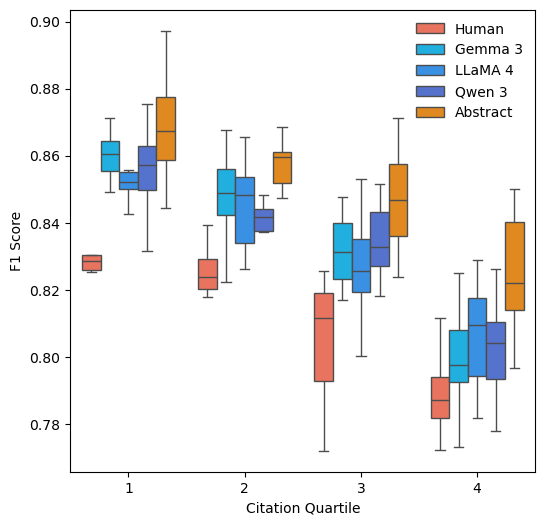

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# metrics_group_df = pd.read_parquet(home / 'projects/TLDR/bias/citation_metrics_group_df.parquet')

df_melt = metrics_group_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
fig = plt.figure(figsize=(6, 6))

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue',
    'abstract': 'darkorange'
}

sns.boxplot(
    data=df_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['annotation', 'gemma3', 'llama4', 'qwen3', 'abstract'],
    palette=palette,
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel('F1 Score')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human',
    'abstract': 'Abstract'
}
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False)

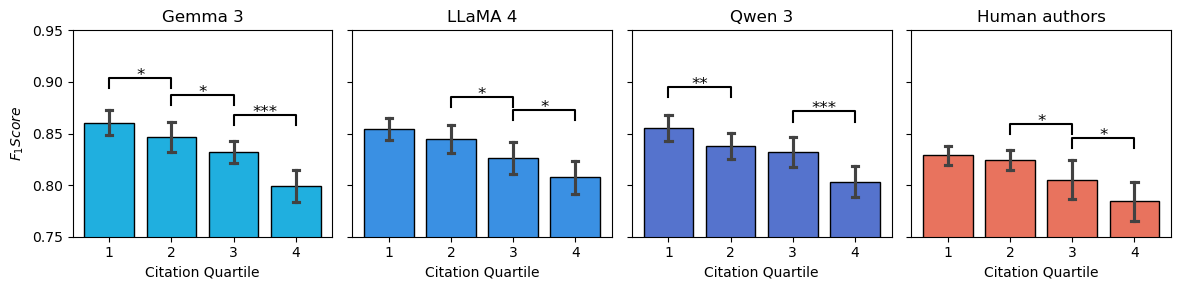

In [ ]:
df_melt = metrics_group_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)

# 计算均值和标准差
df_bar = df_melt.groupby(['quartile', 'feature'])['value'].agg(['mean', 'std']).reset_index()

# 绘制barchart
label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
}

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue',
    'abstract': 'darkorange'
}
n_feat = len(label_mapping)

fig, axes = plt.subplots(1, n_feat, figsize=(3*n_feat, 3), sharey=True)

for i, (feat, label) in enumerate(label_mapping.items()):
    ax = axes[i]
    data = df_melt[df_melt['feature'] == feat]

    sns.barplot(
        data=data,
        x='quartile',
        y='value',
        palette=[palette[feat]],
        hue='feature',
        legend=False,
        edgecolor='black',
        ax=ax,
        errorbar=('sd', 1),
        capsize=0.1
    )
    ax.set_title(label_mapping[feat])
    ax.set_xlabel('Citation Quartile')
    if i == 0:
        ax.set_ylabel(r'$F_1 Score$')
    else:
        ax.set_ylabel('')
    ax.set_ylim(0.75, .95)
    if ax.get_legend():
        ax.legend_.remove()

    # 显著性标注
    quartiles = sorted(data['quartile'].unique())
    bar_centers = range(len(quartiles))
    values = [data[data['quartile'] == q]['value'] for q in quartiles]
    for j in range(len(quartiles)-1):
        group1 = values[j]
        group2 = values[j+1]
        # t 检验
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        # 星号规则
        if pval < 0.001:
            stars = '***'
        elif pval < 0.01:
            stars = '**'
        elif pval < 0.05:
            stars = '*'
        else:
            stars = ''
        if stars:
            # 画星号
            y1 = max(group1.max(), group2.max()) + 0.01
            x1, x2 = bar_centers[j], bar_centers[j+1]
            ax.plot([x1, x1, x2, x2], [y1, y1+0.01, y1+0.01, y1], lw=1.5, c='k')
            ax.text((x1+x2)/2, y1+0.005, stars, ha='center', va='bottom', color='k', fontsize=12)

plt.tight_layout()
plt.show()

#### Summary/Abstract F1 ratio

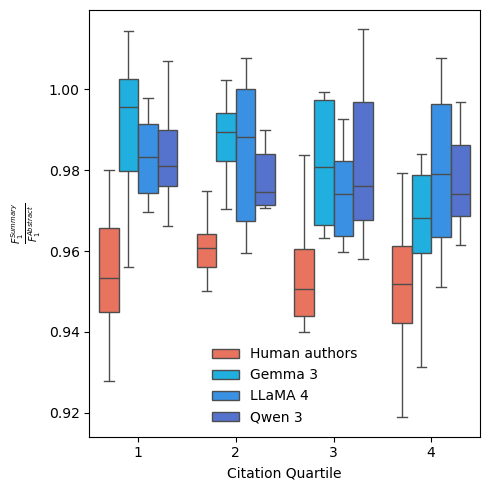

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue'
}

# Step 1: 计算每组的 f1 pivot 表
df_melt = metrics_group_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
# 只保留需要的feature
features = ['gemma3', 'llama4', 'qwen3', 'annotation', 'abstract']
df_melt = df_melt[df_melt['feature'].isin(features)]

# pivot，行: quartile, cv_fold，列: feature，值: value
df_pivot = df_melt.pivot_table(index=['quartile', 'cv_fold'], columns='feature', values='value')

# Step 2: 计算各模型与abstract的ratio
for f in ['gemma3', 'llama4', 'qwen3', 'annotation']:
    df_pivot[f'{f}_ratio'] = df_pivot[f] / df_pivot['abstract']

# Step 3: melt 回长表
df_diff = df_pivot[[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']]].reset_index()
df_diff_melt = df_diff.melt(
    id_vars=['quartile', 'cv_fold'],
    value_vars=[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']],
    var_name='feature',
    value_name='value'
)
df_diff_melt['feature'] = df_diff_melt['feature'].str.replace('_ratio', '')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
}

fig = plt.figure(figsize=(5, 5))
sns.boxplot(
    data=df_diff_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['annotation', 'gemma3', 'llama4', 'qwen3'],
    palette=palette,
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel(r'$\frac{F^{Summary}_1}{F^{Abstract}_1}$')

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False)

plt.tight_layout()
plt.show()

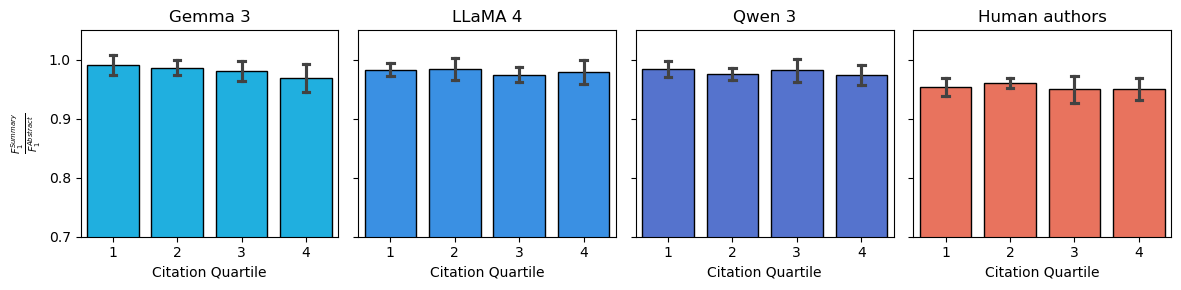

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue'
}

# Step 1: 计算每组的 f1 pivot 表
df_melt = metrics_group_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
# 只保留需要的feature
features = ['gemma3', 'llama4', 'qwen3', 'annotation', 'abstract']
df_melt = df_melt[df_melt['feature'].isin(features)]

# pivot，行: quartile, cv_fold，列: feature，值: value
df_pivot = df_melt.pivot_table(index=['quartile', 'cv_fold'], columns='feature', values='value')

# Step 2: 计算各模型与abstract的ratio
for f in ['gemma3', 'llama4', 'qwen3', 'annotation']:
    df_pivot[f'{f}_ratio'] = df_pivot[f] / df_pivot['abstract']

# Step 3: melt 回长表
df_diff = df_pivot[[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']]].reset_index()
df_diff_melt = df_diff.melt(
    id_vars=['quartile', 'cv_fold'],
    value_vars=[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']],
    var_name='feature',
    value_name='value'
)
df_diff_melt['feature'] = df_diff_melt['feature'].str.replace('_ratio', '')

# 计算均值和标准差
df_bar = df_diff_melt.groupby(['quartile', 'feature'])['value'].agg(['mean', 'std']).reset_index()

# 绘制barchart
label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
}
n_feat = len(label_mapping)

fig, axes = plt.subplots(1, n_feat, figsize=(3*n_feat, 3), sharey=True)

for i, (feat, label) in enumerate(label_mapping.items()):
    ax = axes[i]
    data = df_diff_melt[df_diff_melt['feature'] == feat]

    sns.barplot(
        data=data,
        x='quartile',
        y='value',
        palette=[palette[feat]],
        hue='feature',
        legend=False,
        edgecolor='black',
        ax=ax,
        errorbar=('sd', 1),
        capsize=0.1
    )
    ax.set_title(label_mapping[feat])
    ax.set_xlabel('Citation Quartile')
    if i == 0:
        ax.set_ylabel(r'$\frac{F^{Summary}_1}{F^{Abstract}_1}$')
    else:
        ax.set_ylabel('')
    ax.set_ylim(0.7, 1.05)
    if ax.get_legend():
        ax.legend_.remove()

    # 显著性标注
    quartiles = sorted(data['quartile'].unique())
    bar_centers = range(len(quartiles))
    values = [data[data['quartile'] == q]['value'] for q in quartiles]
    for j in range(len(quartiles)-1):
        group1 = values[j]
        group2 = values[j+1]
        # t 检验
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        # 星号规则
        if pval < 0.001:
            stars = '***'
        elif pval < 0.01:
            stars = '**'
        elif pval < 0.05:
            stars = '*'
        else:
            stars = ''
        if stars:
            # 画星号
            y1 = max(group1.max(), group2.max())
            x1, x2 = bar_centers[j], bar_centers[j+1]
            ax.plot([x1, x1, x2, x2], [y1, y1+0.01, y1+0.01, y1], lw=1.5, c='k')
            ax.text((x1+x2)/2, y1+0.005, stars, ha='center', va='bottom', color='k', fontsize=12)

plt.tight_layout()
plt.show()

#### LLM - Human F1 difference

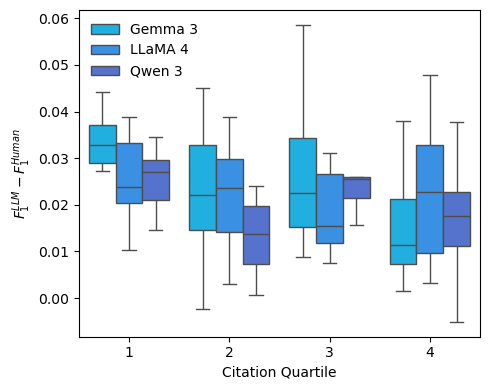

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue'
}

# Step 1: 计算每组的 f1 pivot 表
df_melt = metrics_group_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
# 只保留需要的feature
features = ['gemma3', 'llama4', 'qwen3', 'annotation']
df_melt = df_melt[df_melt['feature'].isin(features)]

# pivot，行: quartile, cv_fold，列: feature，值: value
df_pivot = df_melt.pivot_table(index=['quartile', 'cv_fold'], columns='feature', values='value')

# Step 2: 计算各模型与human的difference
for f in ['gemma3', 'llama4', 'qwen3']:
    df_pivot[f'{f}_diff'] = df_pivot[f] - df_pivot['annotation']

# Step 3: melt 回长表
df_diff = df_pivot[[f'{f}_diff' for f in ['gemma3', 'llama4', 'qwen3']]].reset_index()
df_diff_melt = df_diff.melt(
    id_vars=['quartile', 'cv_fold'],
    value_vars=[f'{f}_diff' for f in ['gemma3', 'llama4', 'qwen3']],
    var_name='feature',
    value_name='value'
)
df_diff_melt['feature'] = df_diff_melt['feature'].str.replace('_diff', '')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
}

fig = plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df_diff_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['gemma3', 'llama4', 'qwen3'],
    palette=palette,
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel(r'$F^{LLM}_1 - F^{Human}_1$')

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False)

plt.tight_layout()
plt.show()

In [11]:
fig.savefig(home / 'projects/TLDR/bias/citation_sub.pdf', bbox_inches='tight')

## Title matching 

In [43]:
print(df.title.isna().sum())
print(df.abstract.isna().sum())
df_title = df[~(df.title.isna() | df.abstract.isna())]
len(df_title)

0
0


27914

In [44]:
df_title_q1 = df_title[(df_topic['C_total'] >= df_title['C_total'].quantile(0.75)) & (df_title['C_total'] <= df_title['C_total'].max())]
df_title_q2 = df_title[(df_title['C_total'] >= df_title['C_total'].quantile(0.5)) & (df_title['C_total'] < df_title['C_total'].quantile(0.75))]
df_title_q3 = df_title[(df_title['C_total'] >= df_title['C_total'].quantile(0.25)) & (df_title['C_total'] < df_title['C_total'].quantile(0.5))]
df_title_q4 = df_title[(df_title['C_total'] >= df_title['C_total'].min()) & (df_title['C_total'] < df_title['C_total'].quantile(0.25))]

### 10 CV

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128, verbose=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
        if verbose:
            model.eval()
            with torch.no_grad():
                val_logits = model(X_val_tensor)
                val_pred = (torch.sigmoid(val_logits) > 0.5).cpu().numpy()
                val_f1 = f1_score(y_val, val_pred, zero_division=0)
                print(f"Epoch {epoch+1}/{num_epochs}, Val F1: {val_f1:.4f}")
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'accuracy': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0),
        'f1': f1_score(y, preds, zero_division=0)
    }

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

def create_tfidf_features(X_title_train, X_content_train, X_title_test, X_content_test, max_features=None):
    tfidf_title = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_content = TfidfVectorizer(max_features=max_features, stop_words='english')
    X_title_train_vec = tfidf_title.fit_transform(X_title_train).toarray()
    X_content_train_vec = tfidf_content.fit_transform(X_content_train).toarray()
    X_title_test_vec = tfidf_title.transform(X_title_test).toarray()
    X_content_test_vec = tfidf_content.transform(X_content_test).toarray()
    X_train_feat = np.concatenate([X_title_train_vec, X_content_train_vec], axis=1)
    X_test_feat = np.concatenate([X_title_test_vec, X_content_test_vec], axis=1)
    return X_train_feat, X_test_feat

#### SBERT+MLP

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

from sentence_transformers import SentenceTransformer
SBERT = SentenceTransformer('all-MiniLM-L6-v2')

def run_one_fold(X_title_emb, X_content_emb, y, train_idx, test_idx, max_features=None):
    X_title_train_emb, X_title_test_emb = X_title_emb[train_idx], X_title_emb[test_idx]
    X_content_train_emb, X_content_test_emb = X_content_emb[train_idx], X_content_emb[test_idx]
    X_train_emb = np.concatenate([X_title_train_emb, X_content_train_emb], axis=1)
    X_test_emb = np.concatenate([X_title_test_emb, X_content_test_emb], axis=1)
    y_train, y_test = y[train_idx], y[test_idx]
    model = train_torch_mlp(X_train_emb, y_train, X_test_emb, y_test, num_epochs=10, verbose=False)
    metrics = eval_torch_mlp(model, X_test_emb, y_test)
    return metrics

results = []
for i, df_q in enumerate([df_title_q1, df_title_q2, df_title_q3, df_title_q4]):
    print(f"\nProcessing quartile {i+1}")
    print(len(df_q), "samples in this quartile")
    pos_df = df_q.copy()
    pos_df['title_paired'] = True
    neg_samples = []
    rng = np.random.default_rng(42)
    for idx, row in tqdm(pos_df.iterrows(), total=len(pos_df), desc="Generating negative samples"):
        candidates = pos_df[(pos_df['mag_vid'] == row['mag_vid']) & (pos_df['paper_id'] != row['paper_id'])]
        if candidates.empty:
            candidates = pos_df[(pos_df['paper_id'] != row['paper_id'])]
        # candidates = pos_df[(pos_df['paper_id'] != row['paper_id'])]
        neg_title = rng.choice(candidates['title'].values)
        neg_row = row.copy()
        neg_row['title'] = neg_title
        neg_row['title_paired'] = False
        neg_samples.append(neg_row)
    neg_df = pd.DataFrame(neg_samples)
    title_match_df = pd.concat([pos_df, neg_df], ignore_index=True)
    print(f"Total samples after pairing: {len(title_match_df)}")

    y = title_match_df['title_paired'].astype(int).values
    X_title = title_match_df['title'].astype(str).fillna('').values
    X_title_emb = SBERT.encode(X_title, show_progress_bar=False, convert_to_tensor=True).cpu().numpy()
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    folds = list(cv.split(X_title, y))

    text_features = ['abstract', 'annotation'] + models
    for feat in text_features:
        print(f"\nProcessing feature: {feat}")
        X_content = title_match_df[feat].astype(str).fillna('').values
        X_content_emb = SBERT.encode(X_content, show_progress_bar=False, convert_to_tensor=True).cpu().numpy()
        F1_scores = []
        for fold_idx, (train_idx, test_idx) in enumerate(folds):
            metrics = run_one_fold(X_title_emb, X_content_emb, y, train_idx, test_idx, 1000)
            F1_scores.append(metrics['f1'])
            results.append({
                'quartile': i+1, 'feature': feat, 'cv_fold': fold_idx+1,
                'f1': metrics['f1'], 'accuracy': metrics['accuracy'],
                'precision': metrics['precision'], 'recall': metrics['recall'],
            })
        print(f"  {feat}'s mean f1 in quartile {i+1}:", np.mean(F1_scores))
        print(f"  {feat}'s std f1 in quartile {i+1}:", np.std(F1_scores))

metrics_title_df = pd.DataFrame(results)
display(metrics_title_df)


Processing quartile 1
6984 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 6984/6984 [00:03<00:00, 1825.70it/s]


Total samples after pairing: 13968

Processing feature: abstract
  abstract's mean f1 in quartile 1: 0.8914119802577825
  abstract's std f1 in quartile 1: 0.007800039424786255

Processing feature: annotation
  annotation's mean f1 in quartile 1: 0.8328305744281931
  annotation's std f1 in quartile 1: 0.007289917316363252

Processing feature: gemma3
  gemma3's mean f1 in quartile 1: 0.8810124834060897
  gemma3's std f1 in quartile 1: 0.006665569416194454

Processing feature: llama4
  llama4's mean f1 in quartile 1: 0.8669978762938968
  llama4's std f1 in quartile 1: 0.00844554736669839

Processing feature: qwen3
  qwen3's mean f1 in quartile 1: 0.8861417402858578
  qwen3's std f1 in quartile 1: 0.006464815500615141

Processing quartile 2
7026 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 7026/7026 [00:01<00:00, 4201.51it/s]


Total samples after pairing: 14052

Processing feature: abstract
  abstract's mean f1 in quartile 2: 0.8867984047509353
  abstract's std f1 in quartile 2: 0.005615684201297096

Processing feature: annotation
  annotation's mean f1 in quartile 2: 0.8148167268711586
  annotation's std f1 in quartile 2: 0.011314513061074992

Processing feature: gemma3
  gemma3's mean f1 in quartile 2: 0.8665546466443838
  gemma3's std f1 in quartile 2: 0.006351466272857972

Processing feature: llama4
  llama4's mean f1 in quartile 2: 0.8514224711191138
  llama4's std f1 in quartile 2: 0.007817718793950922

Processing feature: qwen3
  qwen3's mean f1 in quartile 2: 0.8771766789318983
  qwen3's std f1 in quartile 2: 0.008421181347905565

Processing quartile 3
6951 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 6951/6951 [00:03<00:00, 1998.24it/s]


Total samples after pairing: 13902

Processing feature: abstract
  abstract's mean f1 in quartile 3: 0.8790504447391788
  abstract's std f1 in quartile 3: 0.008159650706129786

Processing feature: annotation
  annotation's mean f1 in quartile 3: 0.8016744613370829
  annotation's std f1 in quartile 3: 0.010283918870672329

Processing feature: gemma3
  gemma3's mean f1 in quartile 3: 0.8573017528557061
  gemma3's std f1 in quartile 3: 0.00820969056500841

Processing feature: llama4
  llama4's mean f1 in quartile 3: 0.8367047125990528
  llama4's std f1 in quartile 3: 0.01066921262561015

Processing feature: qwen3
  qwen3's mean f1 in quartile 3: 0.8636014091706915
  qwen3's std f1 in quartile 3: 0.007186522650163718

Processing quartile 4
6953 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 6953/6953 [00:03<00:00, 1924.42it/s]


Total samples after pairing: 13906

Processing feature: abstract
  abstract's mean f1 in quartile 4: 0.870182928812547
  abstract's std f1 in quartile 4: 0.009734472538413743

Processing feature: annotation
  annotation's mean f1 in quartile 4: 0.7895628174491547
  annotation's std f1 in quartile 4: 0.014584241833018395

Processing feature: gemma3
  gemma3's mean f1 in quartile 4: 0.8479050292541231
  gemma3's std f1 in quartile 4: 0.009862042860082748

Processing feature: llama4
  llama4's mean f1 in quartile 4: 0.826302378622765
  llama4's std f1 in quartile 4: 0.010243777946438723

Processing feature: qwen3
  qwen3's mean f1 in quartile 4: 0.8607028690155257
  qwen3's std f1 in quartile 4: 0.012505600569981746


,quartile,feature,cv_fold,f1,accuracy,precision,recall
0,1,abstract,1,0.894085,0.889764,0.860927,0.929900
1,1,abstract,2,0.886872,0.884037,0.866303,0.908441
2,1,abstract,3,0.883117,0.877595,0.845550,0.924177
3,1,abstract,4,0.891500,0.887616,0.862299,0.922747
4,1,abstract,5,0.888291,0.881174,0.837563,0.945559
...,...,...,...,...,...,...,...
195,4,qwen3,6,0.843068,0.839684,0.825069,0.861871
196,4,qwen3,7,0.877579,0.871942,0.840580,0.917986
197,4,qwen3,8,0.868217,0.865468,0.850829,0.886331
198,4,qwen3,9,0.856164,0.848921,0.816993,0.899281


#### TF-IDF+MLP

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

def run_one_fold(X_title, X_content, y, train_idx, test_idx, max_features=None):
    X_title_train, X_title_test = X_title[train_idx].tolist(), X_title[test_idx].tolist()
    X_content_train, X_content_test = X_content[train_idx].tolist(), X_content[test_idx].tolist()
    y_train, y_test = y[train_idx], y[test_idx]
    X_train_feat, X_test_feat = create_tfidf_features(X_title_train, X_content_train, X_title_test, X_content_test, max_features=max_features)
    model = train_torch_mlp(X_train_feat, y_train, X_test_feat, y_test, num_epochs=10, verbose=False)
    metrics = eval_torch_mlp(model, X_test_feat, y_test)
    return metrics

results = []
for i, df_q in enumerate([df_title_q1, df_title_q2, df_title_q3, df_title_q4]):
    print(f"\nProcessing quartile {i+1}")
    print(len(df_q), "samples in this quartile")
    pos_df = df_q.copy()
    pos_df['title_paired'] = True
    neg_samples = []
    rng = np.random.default_rng(42)
    for idx, row in tqdm(pos_df.iterrows(), total=len(pos_df), desc="Generating negative samples"):
        candidates = pos_df[(pos_df['mag_vid'] == row['mag_vid']) & (pos_df['paper_id'] != row['paper_id'])]
        if candidates.empty:
            candidates = pos_df[(pos_df['paper_id'] != row['paper_id'])]
        # candidates = pos_df[(pos_df['paper_id'] != row['paper_id'])]
        neg_title = rng.choice(candidates['title'].values)
        neg_row = row.copy()
        neg_row['title'] = neg_title
        neg_row['title_paired'] = False
        neg_samples.append(neg_row)
    neg_df = pd.DataFrame(neg_samples)
    title_match_df = pd.concat([pos_df, neg_df], ignore_index=True)
    print(f"Total samples after pairing: {len(title_match_df)}")

    y = title_match_df['title_paired'].astype(int).values
    X_title = title_match_df['title'].astype(str).fillna('').values
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    folds = list(cv.split(X_title, y))

    text_features = ['abstract', 'annotation'] + models
    for feat in text_features:
        print(f"\nProcessing feature: {feat}")
        X_content = title_match_df[feat].astype(str).fillna('').values
        F1_scores = []
        for fold_idx, (train_idx, test_idx) in enumerate(folds):
            metrics = run_one_fold(X_title, X_content, y, train_idx, test_idx, 1000)
            F1_scores.append(metrics['f1'])
            results.append({
                'quartile': i+1, 'feature': feat, 'cv_fold': fold_idx+1,
                'f1': metrics['f1'], 'accuracy': metrics['accuracy'],
                'precision': metrics['precision'], 'recall': metrics['recall'],
            })
        print(f"  {feat}'s mean f1 in quartile {i+1}:", np.mean(F1_scores))
        print(f"  {feat}'s std f1 in quartile {i+1}:", np.std(F1_scores))

metrics_title_df = pd.DataFrame(results)
display(metrics_title_df)


Processing quartile 1
6984 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 6984/6984 [00:03<00:00, 1915.80it/s]


Total samples after pairing: 13968

Processing feature: abstract
  abstract's mean f1 in quartile 1: 0.647356102012469
  abstract's std f1 in quartile 1: 0.02086164650253706

Processing feature: annotation
  annotation's mean f1 in quartile 1: 0.4419090502220316
  annotation's std f1 in quartile 1: 0.01603571465476588

Processing feature: gemma3
  gemma3's mean f1 in quartile 1: 0.5368798673239644
  gemma3's std f1 in quartile 1: 0.01569270387708139

Processing feature: llama4
  llama4's mean f1 in quartile 1: 0.5319677502610384
  llama4's std f1 in quartile 1: 0.01705982631376406

Processing feature: qwen3
  qwen3's mean f1 in quartile 1: 0.5760027645487382
  qwen3's std f1 in quartile 1: 0.015636544499021254

Processing quartile 2
7026 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 7026/7026 [00:03<00:00, 1993.68it/s]


Total samples after pairing: 14052

Processing feature: abstract
  abstract's mean f1 in quartile 2: 0.5968525477043206
  abstract's std f1 in quartile 2: 0.017692607932262138

Processing feature: annotation
  annotation's mean f1 in quartile 2: 0.3860018019168993
  annotation's std f1 in quartile 2: 0.022541577915502348

Processing feature: gemma3
  gemma3's mean f1 in quartile 2: 0.4684440524932554
  gemma3's std f1 in quartile 2: 0.019955125002726084

Processing feature: llama4
  llama4's mean f1 in quartile 2: 0.4495493425218263
  llama4's std f1 in quartile 2: 0.0202490958502901

Processing feature: qwen3
  qwen3's mean f1 in quartile 2: 0.5189269872807233
  qwen3's std f1 in quartile 2: 0.01826218029737936

Processing quartile 3
6951 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 6951/6951 [00:03<00:00, 1995.76it/s]


Total samples after pairing: 13902

Processing feature: abstract
  abstract's mean f1 in quartile 3: 0.5582178494201193
  abstract's std f1 in quartile 3: 0.019737004549157246

Processing feature: annotation
  annotation's mean f1 in quartile 3: 0.3642270594653152
  annotation's std f1 in quartile 3: 0.032155594206836974

Processing feature: gemma3
  gemma3's mean f1 in quartile 3: 0.4394223058734158
  gemma3's std f1 in quartile 3: 0.020050693868636026

Processing feature: llama4
  llama4's mean f1 in quartile 3: 0.4255057409727122
  llama4's std f1 in quartile 3: 0.0308059519918891

Processing feature: qwen3
  qwen3's mean f1 in quartile 3: 0.49150736634706965
  qwen3's std f1 in quartile 3: 0.024752615612875856

Processing quartile 4
6953 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 6953/6953 [00:03<00:00, 2238.05it/s]


Total samples after pairing: 13906

Processing feature: abstract
  abstract's mean f1 in quartile 4: 0.5113532915153842
  abstract's std f1 in quartile 4: 0.02088985542006782

Processing feature: annotation
  annotation's mean f1 in quartile 4: 0.34689849856072436
  annotation's std f1 in quartile 4: 0.023997307944957295

Processing feature: gemma3
  gemma3's mean f1 in quartile 4: 0.4046856009310541
  gemma3's std f1 in quartile 4: 0.02313692074668028

Processing feature: llama4
  llama4's mean f1 in quartile 4: 0.3834977700606686
  llama4's std f1 in quartile 4: 0.013688628970985182

Processing feature: qwen3
  qwen3's mean f1 in quartile 4: 0.4335634208394529
  qwen3's std f1 in quartile 4: 0.011445890205814444


,quartile,feature,cv_fold,f1,accuracy,precision,recall
0,1,abstract,1,0.644922,0.657122,0.669231,0.622318
1,1,abstract,2,0.673281,0.670007,0.667135,0.679542
2,1,abstract,3,0.653576,0.646385,0.640990,0.666667
3,1,abstract,4,0.666667,0.660702,0.655602,0.678112
4,1,abstract,5,0.651862,0.652112,0.651862,0.651862
...,...,...,...,...,...,...,...
195,4,qwen3,6,0.415340,0.419123,0.417758,0.412950
196,4,qwen3,7,0.439913,0.446763,0.445428,0.434532
197,4,qwen3,8,0.429439,0.458993,0.454254,0.407194
198,4,qwen3,9,0.445266,0.460432,0.458143,0.433094


In [72]:
metrics_title_df.to_parquet(home / 'projects/TLDR/bias/citation_metrics_title_df.parquet', index=False)

### Plot

#### Raw F1

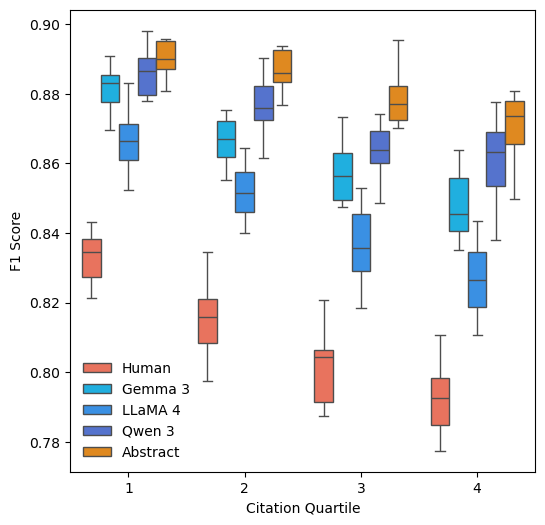

In [67]:
from matplotlib import pyplot as plt
import seaborn as sns
# metrics_title_df = pd.read_parquet(home / 'projects/TLDR/bias/citation_metrics_title_df.parquet')

df_melt = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
fig = plt.figure(figsize=(6, 6))

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue',
    'abstract': 'darkorange'
}

sns.boxplot(
    data=df_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['annotation', 'gemma3', 'llama4', 'qwen3', 'abstract'],
    palette=palette,
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel('F1 Score')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human',
    'abstract': 'Abstract'
}
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False)

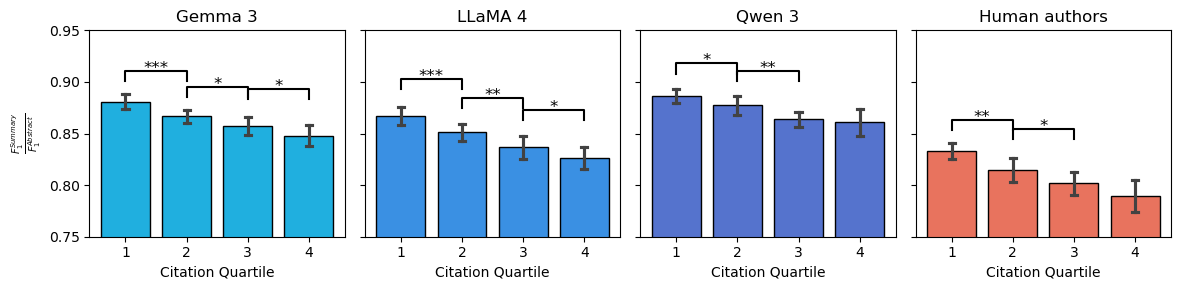

In [ ]:
df_melt = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)

# 计算均值和标准差
df_bar = df_melt.groupby(['quartile', 'feature'])['value'].agg(['mean', 'std']).reset_index()

# 绘制barchart
label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
}
n_feat = len(label_mapping)

fig, axes = plt.subplots(1, n_feat, figsize=(3*n_feat, 3), sharey=True)

for i, (feat, label) in enumerate(label_mapping.items()):
    ax = axes[i]
    data = df_melt[df_melt['feature'] == feat]

    sns.barplot(
        data=data,
        x='quartile',
        y='value',
        palette=[palette[feat]],
        hue='feature',
        legend=False,
        edgecolor='black',
        ax=ax,
        errorbar=('sd', 1),
        capsize=0.1
    )
    ax.set_title(label_mapping[feat])
    ax.set_xlabel('Citation Quartile')
    if i == 0:
        ax.set_ylabel(r'$F_1 Score$')
    else:
        ax.set_ylabel('')
    ax.set_ylim(0.75, .95)
    if ax.get_legend():
        ax.legend_.remove()

    # 显著性标注
    quartiles = sorted(data['quartile'].unique())
    bar_centers = range(len(quartiles))
    values = [data[data['quartile'] == q]['value'] for q in quartiles]
    for j in range(len(quartiles)-1):
        group1 = values[j]
        group2 = values[j+1]
        # t 检验
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        # 星号规则
        if pval < 0.001:
            stars = '***'
        elif pval < 0.01:
            stars = '**'
        elif pval < 0.05:
            stars = '*'
        else:
            stars = ''
        if stars:
            # 画星号
            y1 = max(group1.max(), group2.max()) + 0.01
            x1, x2 = bar_centers[j], bar_centers[j+1]
            ax.plot([x1, x1, x2, x2], [y1, y1+0.01, y1+0.01, y1], lw=1.5, c='k')
            ax.text((x1+x2)/2, y1+0.005, stars, ha='center', va='bottom', color='k', fontsize=12)

plt.tight_layout()
plt.show()

#### Summary/Abstract F1 ratio

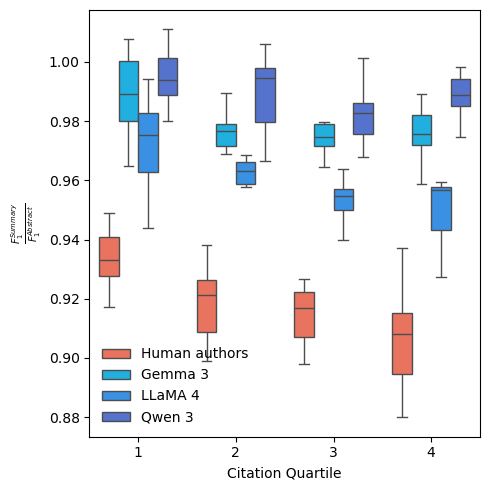

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue'
}

# Step 1: 计算每组的 f1 pivot 表
df_melt = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
# 只保留需要的feature
features = ['gemma3', 'llama4', 'qwen3', 'annotation', 'abstract']
df_melt = df_melt[df_melt['feature'].isin(features)]

# pivot，行: quartile, cv_fold，列: feature，值: value
df_pivot = df_melt.pivot_table(index=['quartile', 'cv_fold'], columns='feature', values='value')

# Step 2: 计算各模型与abstract的ratio
for f in ['gemma3', 'llama4', 'qwen3', 'annotation']:
    df_pivot[f'{f}_ratio'] = df_pivot[f] / df_pivot['abstract']

# Step 3: melt 回长表
df_diff = df_pivot[[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']]].reset_index()
df_diff_melt = df_diff.melt(
    id_vars=['quartile', 'cv_fold'],
    value_vars=[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']],
    var_name='feature',
    value_name='value'
)
df_diff_melt['feature'] = df_diff_melt['feature'].str.replace('_ratio', '')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
}

fig = plt.figure(figsize=(5, 5))
sns.boxplot(
    data=df_diff_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['annotation', 'gemma3', 'llama4', 'qwen3'],
    palette=palette,
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel(r'$\frac{F^{Summary}_1}{F^{Abstract}_1}$')

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False)

plt.tight_layout()
plt.show()

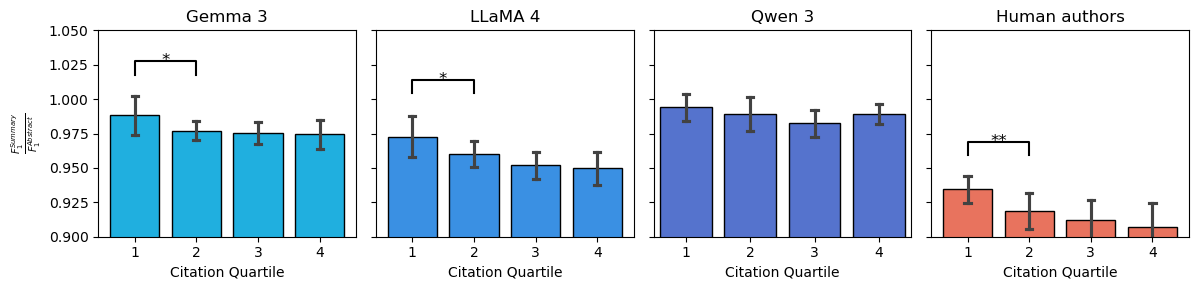

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue'
}

# Step 1: 计算每组的 f1 pivot 表
df_melt = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
# 只保留需要的feature
features = ['gemma3', 'llama4', 'qwen3', 'annotation', 'abstract']
df_melt = df_melt[df_melt['feature'].isin(features)]

# pivot，行: quartile, cv_fold，列: feature，值: value
df_pivot = df_melt.pivot_table(index=['quartile', 'cv_fold'], columns='feature', values='value')

# Step 2: 计算各模型与abstract的ratio
for f in ['gemma3', 'llama4', 'qwen3', 'annotation']:
    df_pivot[f'{f}_ratio'] = df_pivot[f] / df_pivot['abstract']

# Step 3: melt 回长表
df_diff = df_pivot[[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']]].reset_index()
df_diff_melt = df_diff.melt(
    id_vars=['quartile', 'cv_fold'],
    value_vars=[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']],
    var_name='feature',
    value_name='value'
)
df_diff_melt['feature'] = df_diff_melt['feature'].str.replace('_ratio', '')

# 计算均值和标准差
df_bar = df_diff_melt.groupby(['quartile', 'feature'])['value'].agg(['mean', 'std']).reset_index()

# 绘制barchart
label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
}
n_feat = len(label_mapping)

fig, axes = plt.subplots(1, n_feat, figsize=(3*n_feat, 3), sharey=True)

for i, (feat, label) in enumerate(label_mapping.items()):
    ax = axes[i]
    data = df_diff_melt[df_diff_melt['feature'] == feat]

    sns.barplot(
        data=data,
        x='quartile',
        y='value',
        palette=[palette[feat]],
        hue='feature',
        legend=False,
        edgecolor='black',
        ax=ax,
        errorbar=('sd', 1),
        capsize=0.1
    )
    ax.set_title(label_mapping[feat])
    ax.set_xlabel('Citation Quartile')
    if i == 0:
        ax.set_ylabel(r'$\frac{F^{Summary}_1}{F^{Abstract}_1}$')
    else:
        ax.set_ylabel('')
    ax.set_ylim(0.9, 1.05)
    if ax.get_legend():
        ax.legend_.remove()

    # 显著性标注
    quartiles = sorted(data['quartile'].unique())
    bar_centers = range(len(quartiles))
    values = [data[data['quartile'] == q]['value'] for q in quartiles]
    for j in range(len(quartiles)-1):
        group1 = values[j]
        group2 = values[j+1]
        # t 检验
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        # 星号规则
        if pval < 0.001:
            stars = '***'
        elif pval < 0.01:
            stars = '**'
        elif pval < 0.05:
            stars = '*'
        else:
            stars = ''
        if stars:
            # 画星号
            y1 = max(group1.max(), group2.max()) + 0.01
            x1, x2 = bar_centers[j], bar_centers[j+1]
            ax.plot([x1, x1, x2, x2], [y1, y1+0.01, y1+0.01, y1], lw=1.5, c='k')
            ax.text((x1+x2)/2, y1+0.005, stars, ha='center', va='bottom', color='k', fontsize=12)

plt.tight_layout()
plt.show()

#### LLM - Human F1 Difference

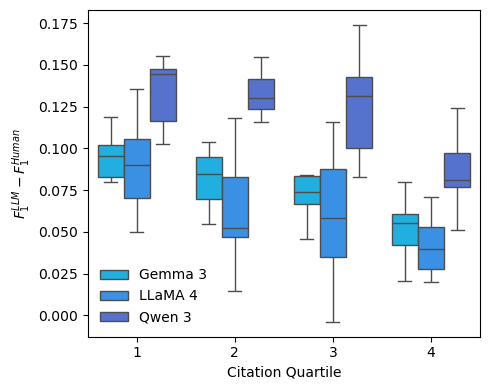

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue'
}

# Step 1: 计算每组的 f1 pivot 表
df_melt = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
# 只保留需要的feature
features = ['gemma3', 'llama4', 'qwen3', 'annotation']
df_melt = df_melt[df_melt['feature'].isin(features)]

# pivot，行: quartile, cv_fold，列: feature，值: value
df_pivot = df_melt.pivot_table(index=['quartile', 'cv_fold'], columns='feature', values='value')

# Step 2: 计算各模型与human的difference
for f in ['gemma3', 'llama4', 'qwen3']:
    df_pivot[f'{f}_diff'] = df_pivot[f] - df_pivot['annotation']

# Step 3: melt 回长表
df_diff = df_pivot[[f'{f}_diff' for f in ['gemma3', 'llama4', 'qwen3']]].reset_index()
df_diff_melt = df_diff.melt(
    id_vars=['quartile', 'cv_fold'],
    value_vars=[f'{f}_diff' for f in ['gemma3', 'llama4', 'qwen3']],
    var_name='feature',
    value_name='value'
)
df_diff_melt['feature'] = df_diff_melt['feature'].str.replace('_diff', '')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
}

fig = plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df_diff_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['gemma3', 'llama4', 'qwen3'],
    palette=palette,
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel(r'$F^{LLM}_1 - F^{Human}_1$')

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False)

plt.tight_layout()
plt.show()

#### Save

In [14]:
fig.savefig(home / 'projects/TLDR/bias/citation_title.pdf', bbox_inches='tight')

# Combined figure

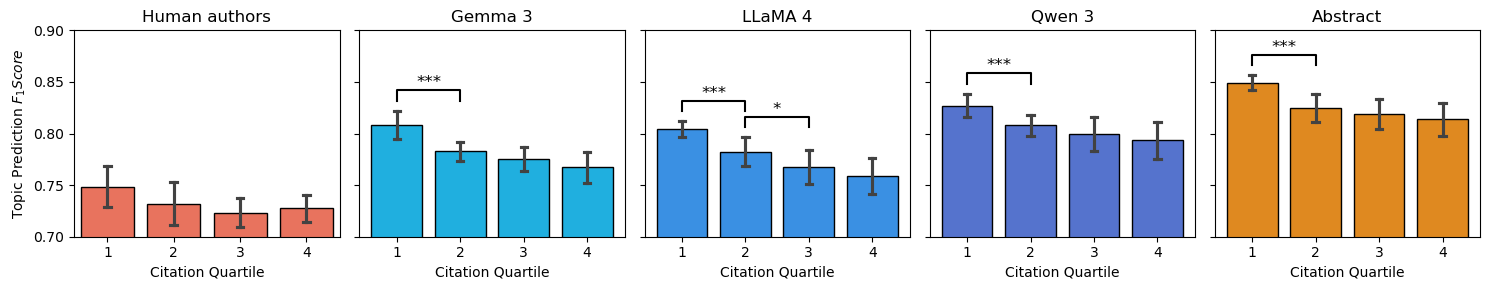

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd
import pathlib

home = pathlib.Path.home()

metrics_group_df = pd.read_parquet(home / 'projects/TLDR/bias/citation_metrics_group_BERTopic_df.parquet')
df_melt = metrics_group_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)

# 计算均值和标准差
df_bar = df_melt.groupby(['quartile', 'feature'])['value'].agg(['mean', 'std']).reset_index()

# 绘制barchart
label_mapping = {
    'annotation': 'Human authors',
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'abstract': 'Abstract'
}
palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue',
    'abstract': 'darkorange'
}

n_feat = len(label_mapping)

fig, axes = plt.subplots(1, n_feat, figsize=(3*n_feat, 3), sharey=True)

for i, (feat, label) in enumerate(label_mapping.items()):
    ax = axes[i]
    data = df_melt[df_melt['feature'] == feat]

    sns.barplot(
        data=data,
        x='quartile',
        y='value',
        palette=[palette[feat]],
        hue='feature',
        legend=False,
        edgecolor='black',
        ax=ax,
        errorbar=('sd', 1),
        capsize=0.1
    )
    ax.set_title(label_mapping[feat])
    ax.set_xlabel('Citation Quartile')
    if i == 0:
        ax.set_ylabel(r'Topic Prediction $F_1 Score$')
    else:
        ax.set_ylabel('')
    ax.set_ylim(0.7, .90)
    if ax.get_legend():
        ax.legend_.remove()

    # 显著性标注
    quartiles = sorted(data['quartile'].unique())
    bar_centers = range(len(quartiles))
    values = [data[data['quartile'] == q]['value'] for q in quartiles]
    for j in range(len(quartiles)-1):
        group1 = values[j]
        group2 = values[j+1]
        # t 检验
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        # 星号规则
        if pval < 0.001:
            stars = '***'
        elif pval < 0.01:
            stars = '**'
        elif pval < 0.05:
            stars = '*'
        else:
            stars = ''
        if stars:
            # 画星号
            y1 = max(group1.mean()+group1.std(), group2.mean()+group2.std()) + 0.01
            x1, x2 = bar_centers[j], bar_centers[j+1]
            ax.plot([x1, x1, x2, x2], [y1, y1+0.01, y1+0.01, y1], lw=1.5, c='k')
            ax.text((x1+x2)/2, y1+0.01, stars, ha='center', va='bottom', color='k', fontsize=12)

plt.tight_layout()
plt.show()

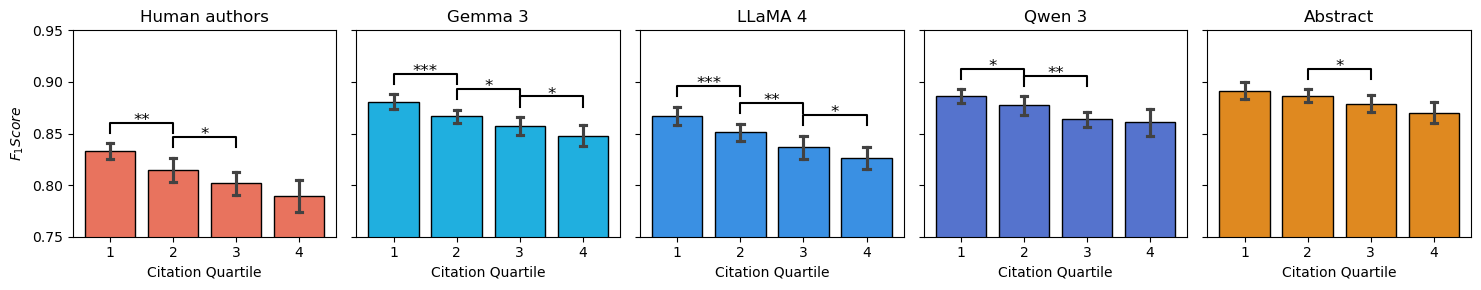

In [4]:
metrics_title_df = pd.read_parquet(home / 'projects/TLDR/bias/citation_metrics_title_df.parquet')
df_melt = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)

# 计算均值和标准差
df_bar = df_melt.groupby(['quartile', 'feature'])['value'].agg(['mean', 'std']).reset_index()

# 绘制barchart
label_mapping = {
    'annotation': 'Human authors',
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'abstract': 'Abstract'
}
n_feat = len(label_mapping)

fig, axes = plt.subplots(1, n_feat, figsize=(3*n_feat, 3), sharey=True)

for i, (feat, label) in enumerate(label_mapping.items()):
    ax = axes[i]
    data = df_melt[df_melt['feature'] == feat]

    sns.barplot(
        data=data,
        x='quartile',
        y='value',
        palette=[palette[feat]],
        hue='feature',
        legend=False,
        edgecolor='black',
        ax=ax,
        errorbar=('sd', 1),
        capsize=0.1
    )
    ax.set_title(label_mapping[feat])
    ax.set_xlabel('Citation Quartile')
    if i == 0:
        ax.set_ylabel(r'$F_1 Score$')
    else:
        ax.set_ylabel('')
    ax.set_ylim(0.75, .95)
    if ax.get_legend():
        ax.legend_.remove()

    # 显著性标注
    quartiles = sorted(data['quartile'].unique())
    bar_centers = range(len(quartiles))
    values = [data[data['quartile'] == q]['value'] for q in quartiles]
    for j in range(len(quartiles)-1):
        group1 = values[j]
        group2 = values[j+1]
        # t 检验
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        # 星号规则
        if pval < 0.001:
            stars = '***'
        elif pval < 0.01:
            stars = '**'
        elif pval < 0.05:
            stars = '*'
        else:
            stars = ''
        if stars:
            # 画星号
            y1 = max(group1.mean()+group1.std(), group2.mean()+group2.std()) + 0.01
            x1, x2 = bar_centers[j], bar_centers[j+1]
            ax.plot([x1, x1, x2, x2], [y1, y1+0.01, y1+0.01, y1], lw=1.5, c='k')
            ax.text((x1+x2)/2, y1+0.005, stars, ha='center', va='bottom', color='k', fontsize=12)

plt.tight_layout()
plt.show()

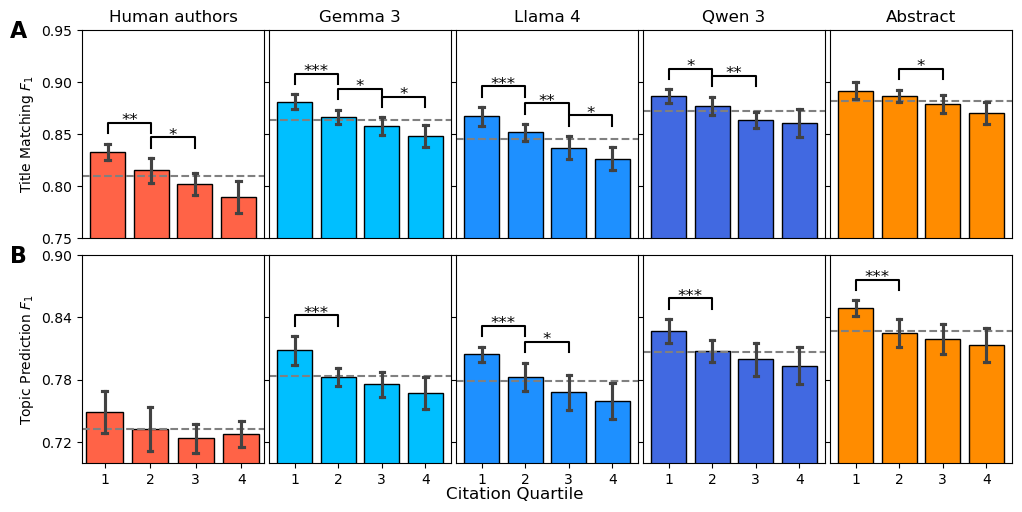

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

label_mapping = {
    'annotation': 'Human authors',
    'gemma3': 'Gemma 3',
    'llama4': 'Llama 4',
    'qwen3': 'Qwen 3',
    'abstract': 'Abstract'
}

palette = {
    'annotation': 'tomato',
    'gemma3': 'deepskyblue',
    'llama4': 'dodgerblue',
    'qwen3': 'royalblue',
    'abstract': 'darkorange'
}

metrics_title_df = pd.read_parquet(home / 'projects/TLDR/bias/citation_metrics_title_df.parquet')
metrics_group_df = pd.read_parquet(home / 'projects/TLDR/bias/citation_metrics_group_BERTopic_df.parquet')

# melt两个数据框
df_melt_group = metrics_group_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
df_melt_title = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
n_feat = len(label_mapping)
fig, axes = plt.subplots(2, n_feat, figsize=(2*n_feat, 5), sharey='row')
for row in range(2):
    for col in range(5):
        axes[row, col].yaxis.set_major_locator(MaxNLocator(nbins=4))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i == 0:
        ax.text(-0.3, 1.05, 'A', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')
    if i == 5:
        ax.text(-0.3, 1.05, 'B', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')

    feat = list(label_mapping.keys())[i%5]

    # Upper：Title Matching
    if i <= 4:
        ax.set_title(label_mapping[feat])
        data = df_melt_title[df_melt_title['feature'] == feat]
        mean_value = data['value'].mean()
        ax.axhline(mean_value, ls='--', color='gray', lw=1.5)
        sns.barplot(
            data=data,
            x='quartile',
            y='value',
            hue='feature',
            edgecolor='black',
            palette=palette,
            saturation=1,
            errorbar=('sd', 1),
            capsize=0.1,
            ax=ax,
            legend=False
        )
        ax.set_xlabel('')
        ax.set_xticks([])
        ax.set_ylabel('Title Matching $F_1$')
        ax.set_ylim(0.75, .95)
    if i >= 5:
        # Lower：Group Matching
        data = df_melt_group[df_melt_group['feature'] == feat]
        mean_value = data['value'].mean()
        ax.axhline(mean_value, ls='--', color='gray', lw=1.5)
        sns.barplot(
            data=data,
            x='quartile',
            y='value',
            hue='feature',
            edgecolor='black',
            palette=palette,
            saturation=1,
            errorbar=('sd', 1),
            capsize=0.1,
            ax=ax,
            legend=False
        )
        ax.set_xlabel('')
        ax.set_ylabel('Topic Prediction $F_1$')
        ax.set_ylim(0.70, .90)
    
    # 显著性标注
    quartiles = sorted(data['quartile'].unique())
    bar_centers = range(len(quartiles))
    values = [data[data['quartile'] == q]['value'] for q in quartiles]
    for j in range(len(quartiles)-1):
        group1 = values[j]
        group2 = values[j+1]
        # t 检验
        stat, pval = ttest_ind(group1, group2, equal_var=False)
        # 星号规则
        if pval < 0.001:
            stars = '***'
        elif pval < 0.01:
            stars = '**'
        elif pval < 0.05:
            stars = '*'
        else:
            stars = ''
        if stars:
            # 画星号
            y1 = max(group1.mean()+group1.std(), group2.mean()+group2.std()) + 0.01
            x1, x2 = bar_centers[j], bar_centers[j+1]
            ax.plot([x1, x1, x2, x2], [y1, y1+0.01, y1+0.01, y1], lw=1.5, c='k')
            ax.text((x1+x2)/2, y1+0.005, stars, ha='center', va='bottom', color='k', fontsize=12)

fig.supxlabel('Citation Quartile', fontsize=12)

plt.tight_layout(pad=0.2, w_pad=0, h_pad=0)
plt.show()

In [6]:
fig.savefig(home / 'projects/TLDR/bias/citation_correlation.pdf', bbox_inches='tight')

# Control subject

In [42]:
df_biochem = df[(df.scopus_cat=='Biochemistry')]

## Subject prediction

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim
import itertools
import warnings

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'acc': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

def sample_pairs(df_q, n_pairs, rng):
    """
    - 正样本：随机选择一个有效类别，从该类别中选两个不同paper组成pair
    - 负样本：随机选择一个类别，选择一个paper，再从其他类别中选择一个paper组成pair
    
    参数:
        df_q: 包含数据的DataFrame
        n_pairs: 需要采样的正负样本对数量
        rng: 随机数生成器
        
    返回:
        pos_pairs, neg_pairs: 正样本对和负样本对的列表
    """
    label_groups = {k: v.index.tolist() for k, v in df_q.groupby('p2v_label')} # 按标签分组
    valid_labels = [lbl for lbl, idxs in label_groups.items() if len(idxs) >= 2]  # 找出有效标签（至少有2个样本）
    if not valid_labels:
        raise ValueError("没有找到包含至少2个样本的有效标签")
    all_pairs = set() # 用于跟踪所有生成的对（无论正负）以避免重复
    
    # 生成正样本对
    pos_pairs = []
    attempts_pos = 0
    max_attempts_pos = n_pairs * 10  # 避免无限循
    while len(pos_pairs) < n_pairs and attempts_pos < max_attempts_pos:
        attempts_pos += 1
        # 1. 随机选择一个有效标签
        label = rng.choice(valid_labels)
        papers = label_groups[label]
        if len(papers) < 2:
            continue
        # 2. 从该标签的papers中选择两个不同的paper
        idx1, idx2 = rng.choice(papers, 2, replace=False)
        pair = (min(idx1, idx2), max(idx1, idx2))  # 确保顺序一致性
        # 3. 检查是否重复
        if pair not in all_pairs:
            pos_pairs.append(pair)
            all_pairs.add(pair)
    if len(pos_pairs) < n_pairs:
        warnings.warn(f"只能生成 {len(pos_pairs)}/{n_pairs} 个正样本对")
    
    # 生成负样本对
    neg_pairs = []
    attempts_neg = 0
    max_attempts_neg = n_pairs * 10  # 避免无限循环
    # 创建一个反向映射，用于快速检查索引属于哪个标签
    index_to_label = {}
    for label, indices in label_groups.items():
        for idx in indices:
            index_to_label[idx] = label
    
    while len(neg_pairs) < n_pairs and attempts_neg < max_attempts_neg:
        attempts_neg += 1
        # 1. 随机选择一个标签
        label1 = rng.choice(list(label_groups.keys()))
        if not label_groups[label1]:  # 如果该标签没有样本，跳过
            continue
        # 2. 从该标签中选择一个paper
        idx1 = rng.choice(label_groups[label1])
        # 3. 构建不属于该标签的papers列表
        other_papers = [idx for idx in df_q.index if index_to_label.get(idx) != label1]
        if not other_papers:  # 如果没有其他标签的paper，跳过
            continue
        # 4. 从其他标签的papers中选择一个
        idx2 = rng.choice(other_papers)
        # 确保顺序一致性并检查重复
        pair = (min(idx1, idx2), max(idx1, idx2))
        if pair not in all_pairs:
            neg_pairs.append(pair)
            all_pairs.add(pair)
    if len(neg_pairs) < n_pairs:
        warnings.warn(f"只能生成 {len(neg_pairs)}/{n_pairs} 个负样本对")
        
    return pos_pairs, neg_pairs

PAIR_SAMPLE_SIZE = 10000
rng = np.random.default_rng(42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrics_list = []
metrics_sub_df = pd.DataFrame(columns=[
    'quartile', 'feature', 'cv_fold', 'f1', 'acc', 'precision', 'recall',
])
quartiles = [
    df_bio[(df_bio['C_total'] >= df_bio['C_total'].quantile(0.75)) & (df_bio['C_total'] <= df_bio['C_total'].max())],
    df_bio[(df_bio['C_total'] >= df_bio['C_total'].quantile(0.5)) & (df_bio['C_total'] < df_bio['C_total'].quantile(0.75))],
    df_bio[(df_bio['C_total'] >= df_bio['C_total'].quantile(0.25)) & (df_bio['C_total'] < df_bio['C_total'].quantile(0.5))],
    df_bio[(df_bio['C_total'] >= df_bio['C_total'].min()) & (df_bio['C_total'] < df_bio['C_total'].quantile(0.25))]
]
for i, df_q in enumerate(quartiles):
    df_q = df_q.reset_index(drop=True)
    pos_pairs, neg_pairs = sample_pairs(df_q, PAIR_SAMPLE_SIZE, rng)
    print(f"Quartile {i+1}: {len(pos_pairs)} positive pairs, {len(neg_pairs)} negative pairs")
    pair_samples = (
        [{'idx1': idx1, 'idx2': idx2, 'label': 1} for idx1, idx2 in pos_pairs] +
        [{'idx1': idx1, 'idx2': idx2, 'label': 0} for idx1, idx2 in neg_pairs]
    )
    pair_samples_df = pd.DataFrame(pair_samples)

    for feat in ['abstract', 'annotation'] + models:
        X = df_q[feat].astype(str).fillna('').tolist()
        y = pair_samples_df['label'].values
        txt1_list = [X[row['idx1']] for _, row in pair_samples_df.iterrows()]
        txt2_list = [X[row['idx2']] for _, row in pair_samples_df.iterrows()]

        F1_scores = []
        for fold_idx, (train_idx, test_idx) in enumerate(cv.split(np.zeros(len(y)), y)):
            # Fit vectorizer on train set ONLY
            txt1_train = [txt1_list[j] for j in train_idx]
            txt2_train = [txt2_list[j] for j in train_idx]
            txt1_test = [txt1_list[j] for j in test_idx]
            txt2_test = [txt2_list[j] for j in test_idx]

            vectorizer1 = TfidfVectorizer(max_features=1000, stop_words='english')
            vectorizer2 = TfidfVectorizer(max_features=1000, stop_words='english')
            vec1_train = vectorizer1.fit_transform(txt1_train).toarray()
            vec2_train = vectorizer2.fit_transform(txt2_train).toarray()
            vec1_test = vectorizer1.transform(txt1_test).toarray()
            vec2_test = vectorizer2.transform(txt2_test).toarray()
            X_train = np.concatenate([vec1_train, vec2_train], axis=1)
            X_test = np.concatenate([vec1_test, vec2_test], axis=1)
            y_train = y[train_idx]
            y_test = y[test_idx]
            model = train_torch_mlp(X_train, y_train, X_test, y_test, num_epochs=10)
            metrics = eval_torch_mlp(model, X_test, y_test)
            metrics_list.append({
                'quartile': i+1, 'feature': feat, 'cv_fold': fold_idx+1,
                'f1': metrics['f1'], 'acc': metrics['acc'],
                'precision': metrics['precision'], 'recall': metrics['recall'],
            })
            F1_scores.append(metrics['f1'])
        print(f"    {feat}: Mean F1={np.mean(F1_scores):.4f}, Std F1={np.std(F1_scores):.4f}")

metrics_sub_df = pd.DataFrame(metrics_list)
display(metrics_sub_df)

Quartile 1: 10000 positive pairs, 10000 negative pairs
    abstract: Mean F1=0.6891, Std F1=0.0132
    annotation: Mean F1=0.5048, Std F1=0.0099
    llama4: Mean F1=0.5094, Std F1=0.0194
    gemma3: Mean F1=0.5208, Std F1=0.0170
    qwen3: Mean F1=0.5272, Std F1=0.0150
Quartile 2: 10000 positive pairs, 10000 negative pairs
    abstract: Mean F1=0.6632, Std F1=0.0205
    annotation: Mean F1=0.5050, Std F1=0.0160
    llama4: Mean F1=0.5149, Std F1=0.0137
    gemma3: Mean F1=0.5082, Std F1=0.0157
    qwen3: Mean F1=0.5127, Std F1=0.0242
Quartile 3: 10000 positive pairs, 10000 negative pairs
    abstract: Mean F1=0.7242, Std F1=0.0086
    annotation: Mean F1=0.5150, Std F1=0.0206
    llama4: Mean F1=0.5216, Std F1=0.0161
    gemma3: Mean F1=0.5364, Std F1=0.0138
    qwen3: Mean F1=0.5399, Std F1=0.0175
Quartile 4: 10000 positive pairs, 10000 negative pairs
    abstract: Mean F1=0.7967, Std F1=0.0062
    annotation: Mean F1=0.6172, Std F1=0.0159
    llama4: Mean F1=0.6779, Std F1=0.0035
   

,quartile,feature,cv_fold,f1,acc,precision,recall
0,1,abstract,1,0.672319,0.6715,0.670647,0.674
1,1,abstract,2,0.674310,0.6875,0.704026,0.647
2,1,abstract,3,0.693320,0.6970,0.701844,0.685
3,1,abstract,4,0.683610,0.6950,0.710129,0.659
4,1,abstract,5,0.689084,0.6810,0.672053,0.707
...,...,...,...,...,...,...,...
195,4,qwen3,6,0.671484,0.6590,0.647770,0.697
196,4,qwen3,7,0.653446,0.6505,0.647984,0.659
197,4,qwen3,8,0.671590,0.6665,0.661494,0.682
198,4,qwen3,9,0.658777,0.6540,0.649805,0.668


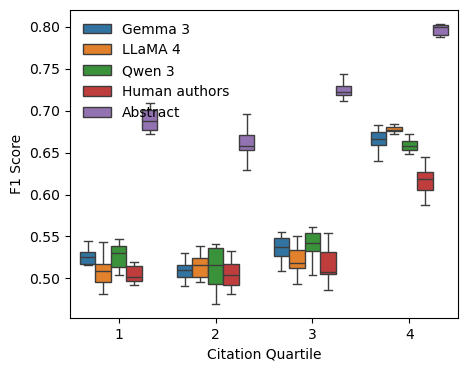

In [52]:
df_melt = metrics_sub_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
fig = plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['gemma3', 'llama4', 'qwen3', 'annotation', 'abstract'],
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel('F1 Score')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
    'abstract': 'Abstract'
}
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False)


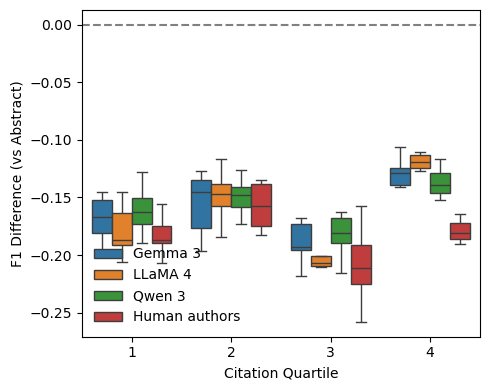

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: 计算每组的 f1 pivot 表
df_melt = metrics_sub_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
# 只保留需要的feature
features = ['gemma3', 'llama4', 'qwen3', 'annotation', 'abstract']
df_melt = df_melt[df_melt['feature'].isin(features)]

# pivot，行: quartile, cv_fold，列: feature，值: value
df_pivot = df_melt.pivot_table(index=['quartile', 'cv_fold'], columns='feature', values='value')

# Step 2: 计算各模型与abstract的差值
for f in ['gemma3', 'llama4', 'qwen3', 'annotation']:
    df_pivot[f'{f}_diff'] = df_pivot[f] - df_pivot['abstract']

# Step 3: melt 回长表
df_diff = df_pivot[[f'{f}_diff' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']]].reset_index()
df_diff_melt = df_diff.melt(
    id_vars=['quartile', 'cv_fold'],
    value_vars=[f'{f}_diff' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']],
    var_name='feature',
    value_name='value'
)
df_diff_melt['feature'] = df_diff_melt['feature'].str.replace('_diff', '')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
}

fig = plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df_diff_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['gemma3', 'llama4', 'qwen3', 'annotation'],
    showfliers=False
)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Citation Quartile')
plt.ylabel('F1 Difference (vs Abstract)')

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False, loc="lower left")

plt.tight_layout()
plt.show()

## Title matching

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128, verbose=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
        if verbose:
            model.eval()
            with torch.no_grad():
                val_logits = model(X_val_tensor)
                val_pred = (torch.sigmoid(val_logits) > 0.5).cpu().numpy()
                val_f1 = f1_score(y_val, val_pred, zero_division=0)
                print(f"Epoch {epoch+1}/{num_epochs}, Val F1: {val_f1:.4f}")
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'accuracy': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0),
        'f1': f1_score(y, preds, zero_division=0)
    }

def create_tfidf_features(X_title_train, X_content_train, X_title_test, X_content_test, max_features=None):
    tfidf_title = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_content = TfidfVectorizer(max_features=max_features, stop_words='english')
    X_title_train_vec = tfidf_title.fit_transform(X_title_train).toarray()
    X_content_train_vec = tfidf_content.fit_transform(X_content_train).toarray()
    X_title_test_vec = tfidf_title.transform(X_title_test).toarray()
    X_content_test_vec = tfidf_content.transform(X_content_test).toarray()
    X_train_feat = np.concatenate([X_title_train_vec, X_content_train_vec], axis=1)
    X_test_feat = np.concatenate([X_title_test_vec, X_content_test_vec], axis=1)
    return X_train_feat, X_test_feat

def run_one_fold(X_title, X_content, y, train_idx, test_idx, max_features=None):
    X_title_train, X_title_test = X_title[train_idx].tolist(), X_title[test_idx].tolist()
    X_content_train, X_content_test = X_content[train_idx].tolist(), X_content[test_idx].tolist()
    y_train, y_test = y[train_idx], y[test_idx]
    X_train_feat, X_test_feat = create_tfidf_features(X_title_train, X_content_train, X_title_test, X_content_test, max_features=max_features)
    model = train_torch_mlp(X_train_feat, y_train, X_test_feat, y_test, num_epochs=10)
    metrics = eval_torch_mlp(model, X_test_feat, y_test)
    return metrics

# 分四等分
df_q1 = df_bio[(df_bio['C_total'] >= df_bio['C_total'].quantile(0.75)) & (df_bio['C_total'] <= df_bio['C_total'].max())]
df_q2 = df_bio[(df_bio['C_total'] >= df_bio['C_total'].quantile(0.5)) & (df_bio['C_total'] < df_bio['C_total'].quantile(0.75))]
df_q3 = df_bio[(df_bio['C_total'] >= df_bio['C_total'].quantile(0.25)) & (df_bio['C_total'] < df_bio['C_total'].quantile(0.5))]
df_q4 = df_bio[(df_bio['C_total'] >= df_bio['C_total'].min()) & (df_bio['C_total'] < df_bio['C_total'].quantile(0.25))]

metrics_title_df = pd.DataFrame(columns=[
    'quartile', 'feature', 'cv_fold',
    'f1', 'accuracy', 'precision', 'recall',
])

for i, df_q in enumerate([df_q1, df_q2, df_q3, df_q4]):
    print(f"\nProcessing quartile {i+1}")
    print(len(df_q), "samples in this quartile")
    pos_df = df_q.copy()
    pos_df['title_paired'] = True
    neg_samples = []
    rng = np.random.default_rng(42)
    for idx, row in tqdm(pos_df.iterrows(), total=len(pos_df), desc="Generating negative samples"):
        candidates = pos_df[(pos_df['p2v_label'] == row['p2v_label']) & (pos_df['paper_id'] != row['paper_id'])]
        if candidates.empty:
            candidates = pos_df[(pos_df['paper_id'] != row['paper_id'])]
        neg_title = rng.choice(candidates['title'].values)
        neg_row = row.copy()
        neg_row['title'] = neg_title
        neg_row['title_paired'] = False
        neg_samples.append(neg_row)
    neg_df = pd.DataFrame(neg_samples)
    title_match_df = pd.concat([pos_df, neg_df], ignore_index=True)
    print(f"Total samples after pairing: {len(title_match_df)}")

    y = title_match_df['title_paired'].astype(int).values
    X_title = title_match_df['title'].astype(str).fillna('').values
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    folds = list(cv.split(X_title, y))

    text_features = ['abstract', 'annotation'] + models
    for feat in text_features:
        print(f"\nProcessing feature: {feat}")
        X_content = title_match_df[feat].astype(str).fillna('').values
        print(f"  {feat} k-folds串行执行...")
        metrics_list = []
        for fold_idx, (train_idx, test_idx) in enumerate(folds):
            metrics = run_one_fold(X_title, X_content, y, train_idx, test_idx, 1000)
            metrics_list.append(metrics)
        for fold_idx, metrics in enumerate(metrics_list):
            metrics_title_df = pd.concat([
                metrics_title_df,
                pd.DataFrame({
                    'quartile': [i+1], 'feature': [feat], 'cv_fold': [fold_idx+1],
                    'accuracy': [metrics['accuracy']],
                    'precision': [metrics['precision']],
                    'recall': [metrics['recall']],
                    'f1': [metrics['f1']],
                })
            ], ignore_index=True)
        print(f"  {feat}'s mean f1 in quartile {i+1}:", 
              metrics_title_df[(metrics_title_df['quartile'] == i+1) & (metrics_title_df['feature'] == feat)]['f1'].mean())
        print(f"  {feat}'s std f1 in quartile {i+1}:", 
              metrics_title_df[(metrics_title_df['quartile'] == i+1) & (metrics_title_df['feature'] == feat)]['f1'].std())

display(metrics_title_df)


Processing quartile 1
4610 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 4610/4610 [00:03<00:00, 1329.31it/s]


Total samples after pairing: 9220

Processing feature: abstract
  abstract k-folds串行执行...


/tmp/ipykernel_3843/2027393460.py:132: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_title_df = pd.concat([


  abstract's mean f1 in quartile 1: 0.7212040312120872
  abstract's std f1 in quartile 1: 0.014586633483020608

Processing feature: annotation
  annotation k-folds串行执行...
  annotation's mean f1 in quartile 1: 0.46204195000543996
  annotation's std f1 in quartile 1: 0.015353349555581026

Processing feature: llama4
  llama4 k-folds串行执行...
  llama4's mean f1 in quartile 1: 0.5601300135705718
  llama4's std f1 in quartile 1: 0.02287339425374634

Processing feature: gemma3
  gemma3 k-folds串行执行...
  gemma3's mean f1 in quartile 1: 0.5792907764441356
  gemma3's std f1 in quartile 1: 0.028335252965375167

Processing feature: qwen3
  qwen3 k-folds串行执行...
  qwen3's mean f1 in quartile 1: 0.6361946704430428
  qwen3's std f1 in quartile 1: 0.022472472388288478

Processing quartile 2
4610 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 4610/4610 [00:04<00:00, 1112.09it/s]


Total samples after pairing: 9220

Processing feature: abstract
  abstract k-folds串行执行...
  abstract's mean f1 in quartile 2: 0.6511433956043181
  abstract's std f1 in quartile 2: 0.01899521355764106

Processing feature: annotation
  annotation k-folds串行执行...
  annotation's mean f1 in quartile 2: 0.40078068266750255
  annotation's std f1 in quartile 2: 0.012184528435996772

Processing feature: llama4
  llama4 k-folds串行执行...
  llama4's mean f1 in quartile 2: 0.4947211693291943
  llama4's std f1 in quartile 2: 0.027926669598965854

Processing feature: gemma3
  gemma3 k-folds串行执行...
  gemma3's mean f1 in quartile 2: 0.5094703561244943
  gemma3's std f1 in quartile 2: 0.018021001697354686

Processing feature: qwen3
  qwen3 k-folds串行执行...
  qwen3's mean f1 in quartile 2: 0.570058105370544
  qwen3's std f1 in quartile 2: 0.030410545777266706

Processing quartile 3
4629 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 4629/4629 [00:03<00:00, 1245.93it/s]


Total samples after pairing: 9258

Processing feature: abstract
  abstract k-folds串行执行...
  abstract's mean f1 in quartile 3: 0.6332060661740455
  abstract's std f1 in quartile 3: 0.031044444973616858

Processing feature: annotation
  annotation k-folds串行执行...
  annotation's mean f1 in quartile 3: 0.3977538338767057
  annotation's std f1 in quartile 3: 0.023137833383264764

Processing feature: llama4
  llama4 k-folds串行执行...
  llama4's mean f1 in quartile 3: 0.48343959675982867
  llama4's std f1 in quartile 3: 0.022960590704987533

Processing feature: gemma3
  gemma3 k-folds串行执行...
  gemma3's mean f1 in quartile 3: 0.49774573206646366
  gemma3's std f1 in quartile 3: 0.025219094550865847

Processing feature: qwen3
  qwen3 k-folds串行执行...
  qwen3's mean f1 in quartile 3: 0.538649759192465
  qwen3's std f1 in quartile 3: 0.03224258268084762

Processing quartile 4
4590 samples in this quartile


Generating negative samples: 100%|██████████████████████████████████████████| 4590/4590 [00:03<00:00, 1199.11it/s]


Total samples after pairing: 9180

Processing feature: abstract
  abstract k-folds串行执行...
  abstract's mean f1 in quartile 4: 0.5836834766757477
  abstract's std f1 in quartile 4: 0.01376703997086915

Processing feature: annotation
  annotation k-folds串行执行...
  annotation's mean f1 in quartile 4: 0.35125314803032537
  annotation's std f1 in quartile 4: 0.017750514284975556

Processing feature: llama4
  llama4 k-folds串行执行...
  llama4's mean f1 in quartile 4: 0.4347268982738197
  llama4's std f1 in quartile 4: 0.016994343656727754

Processing feature: gemma3
  gemma3 k-folds串行执行...
  gemma3's mean f1 in quartile 4: 0.4605560481029297
  gemma3's std f1 in quartile 4: 0.014624900541653649

Processing feature: qwen3
  qwen3 k-folds串行执行...
  qwen3's mean f1 in quartile 4: 0.5149914538151399
  qwen3's std f1 in quartile 4: 0.017182740411517534


,quartile,feature,cv_fold,f1,accuracy,precision,recall
0,1,abstract,1,0.733333,0.722343,0.705411,0.763557
1,1,abstract,2,0.715768,0.702820,0.685885,0.748373
2,1,abstract,3,0.733333,0.722343,0.705411,0.763557
3,1,abstract,4,0.711618,0.698482,0.681909,0.744035
4,1,abstract,5,0.718004,0.718004,0.718004,0.718004
...,...,...,...,...,...,...,...
195,4,qwen3,6,0.494279,0.518519,0.520482,0.470588
196,4,qwen3,7,0.500537,0.493464,0.493644,0.507625
197,4,qwen3,8,0.524272,0.519608,0.519231,0.529412
198,4,qwen3,9,0.550321,0.542484,0.541053,0.559913


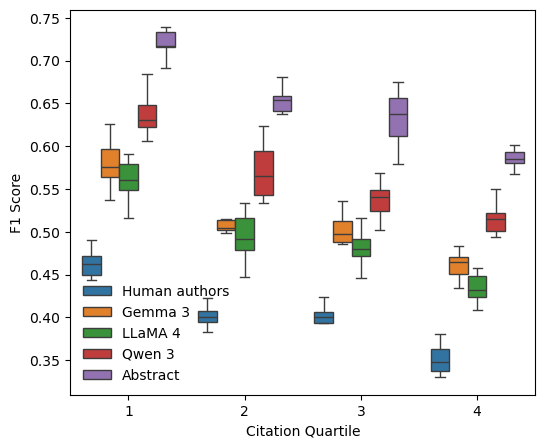

In [85]:
df_melt = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
fig = plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['annotation', 'gemma3', 'llama4', 'qwen3', 'abstract'],
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel('F1 Score')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
    'abstract': 'Abstract'
}
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False, loc="lower left")

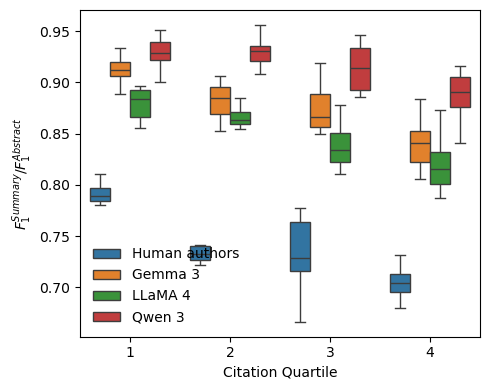

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: 计算每组的 f1 pivot 表
df_melt = metrics_title_df.melt(
    id_vars=['quartile', 'feature', 'cv_fold'],
    value_vars=['f1'],
    var_name='metric',
    value_name='value'
)
# 只保留需要的feature
features = ['gemma3', 'llama4', 'qwen3', 'annotation', 'abstract']
df_melt = df_melt[df_melt['feature'].isin(features)]

# pivot，行: quartile, cv_fold，列: feature，值: value
df_pivot = df_melt.pivot_table(index=['quartile', 'cv_fold'], columns='feature', values='value')

# Step 2: 计算各模型与abstract的ratio
for f in ['gemma3', 'llama4', 'qwen3', 'annotation']:
    df_pivot[f'{f}_ratio'] = df_pivot[f] / df_pivot['abstract']

# Step 3: melt 回长表
df_diff = df_pivot[[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']]].reset_index()
df_diff_melt = df_diff.melt(
    id_vars=['quartile', 'cv_fold'],
    value_vars=[f'{f}_ratio' for f in ['gemma3', 'llama4', 'qwen3', 'annotation']],
    var_name='feature',
    value_name='value'
)
df_diff_melt['feature'] = df_diff_melt['feature'].str.replace('_ratio', '')

label_mapping = {
    'gemma3': 'Gemma 3',
    'llama4': 'LLaMA 4',
    'qwen3': 'Qwen 3',
    'annotation': 'Human authors',
}

fig = plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df_diff_melt,
    x='quartile',
    y='value',
    hue='feature',
    hue_order=['annotation', 'gemma3', 'llama4', 'qwen3'],
    showfliers=False
)
plt.xlabel('Citation Quartile')
plt.ylabel(r'$F^{Summary}_1 / F^{Abstract}_1$')

handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles, [label_mapping[label] for label in labels], frameon=False, loc="lower left")

plt.tight_layout()
plt.show()

# Tail